In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [2]:
df=pd.read_csv("relationship_comments_19.csv",sep=";",index_col=[0])

In [3]:
# Annahme: Dein DataFrame heißt df
anzahl_removed = df['body'].value_counts().get('[removed]', 0)

print(f"Anzahl der Zeilen mit '[removed]' in der Spalte 'body': {anzahl_removed}")

Anzahl der Zeilen mit '[removed]' in der Spalte 'body': 11474


# General EDA

In [6]:
df.head()

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,total_awards_received,author_cakeday
0,[],NaN,desaparecidose,1.400310e+09,NaN,NaN,[],NaN,NaN,NaN,...,1580511454,3,True,False,relationships,t5_2qjvn,r/relationships,public,0,NaN
1,[],NaN,mainshkweez,NaN,NaN,NaN,[],NaN,NaN,NaN,...,1580511499,1,True,False,relationships,t5_2qjvn,r/relationships,public,0,NaN
2,[],NaN,Roccet_MS,1.487616e+09,NaN,NaN,[],NaN,NaN,NaN,...,1580511502,3,True,False,relationships,t5_2qjvn,r/relationships,public,0,NaN
3,[],NaN,stephowl,NaN,NaN,NaN,[],NaN,NaN,NaN,...,1580511502,4,True,False,relationships,t5_2qjvn,r/relationships,public,0,NaN
4,[],NaN,AMerrickanGirl,1.171318e+09,NaN,NaN,[],NaN,NaN,NaN,...,1580511531,1,True,False,relationships,t5_2qjvn,r/relationships,public,0,NaN


In [7]:
df.tail()

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,total_awards_received,author_cakeday
198320,[],NaN,[deleted],NaN,NaN,NaN,NaN,NaN,NaN,dark,...,1584150565,1,True,False,relationships,t5_2qjvn,r/relationships,public,0,NaN
198321,[],NaN,danx1000,1.346275e+09,NaN,NaN,[],NaN,NaN,NaN,...,1584150584,1,True,False,relationships,t5_2qjvn,r/relationships,public,0,NaN
198322,[],NaN,ErgonomicCat,1.428530e+09,NaN,NaN,[],NaN,NaN,NaN,...,1584150584,2,True,False,relationships,t5_2qjvn,r/relationships,public,0,NaN
198323,[],NaN,thewordofrob,1.455036e+09,NaN,NaN,[],NaN,NaN,NaN,...,1584150607,2,True,False,relationships,t5_2qjvn,r/relationships,public,0,NaN
198324,[],NaN,bicep123,1.379593e+09,NaN,NaN,[],NaN,NaN,NaN,...,1584150627,2,True,False,relationships,t5_2qjvn,r/relationships,public,0,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198325 entries, 0 to 198324
Data columns (total 46 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   all_awardings                    198325 non-null  object 
 1   associated_award                 0 non-null       float64
 2   author                           198325 non-null  object 
 3   author_created_utc               117047 non-null  float64
 4   author_flair_background_color    0 non-null       float64
 5   author_flair_css_class           0 non-null       float64
 6   author_flair_richtext            167713 non-null  object 
 7   author_flair_template_id         0 non-null       float64
 8   author_flair_text                0 non-null       float64
 9   author_flair_text_color          30612 non-null   object 
 10  author_flair_type                167713 non-null  object 
 11  author_fullname                  167713 non-null  object 
 12  au

In [9]:
df.isnull().sum() 

all_awardings                           0
associated_award                   198325
author                                  0
author_created_utc                  81278
author_flair_background_color      198325
author_flair_css_class             198325
author_flair_richtext               30612
author_flair_template_id           198325
author_flair_text                  198325
author_flair_text_color            167713
author_flair_type                   30612
author_fullname                     30612
author_patreon_flair                30612
author_premium                      30612
awarders                                0
body                                    0
can_gild                                0
can_mod_post                            0
collapsed                               0
collapsed_because_crowd_control    198325
collapsed_reason                   195746
controversiality                        0
created_utc                             0
distinguished                     

In [10]:
df.columns

Index(['all_awardings', 'associated_award', 'author', 'author_created_utc',
       'author_flair_background_color', 'author_flair_css_class',
       'author_flair_richtext', 'author_flair_template_id',
       'author_flair_text', 'author_flair_text_color', 'author_flair_type',
       'author_fullname', 'author_patreon_flair', 'author_premium', 'awarders',
       'body', 'can_gild', 'can_mod_post', 'collapsed',
       'collapsed_because_crowd_control', 'collapsed_reason',
       'controversiality', 'created_utc', 'distinguished', 'edited', 'gilded',
       'gildings', 'id', 'is_submitter', 'link_id', 'locked', 'no_follow',
       'parent_id', 'permalink', 'quarantined', 'removal_reason',
       'retrieved_on', 'score', 'send_replies', 'stickied', 'subreddit',
       'subreddit_id', 'subreddit_name_prefixed', 'subreddit_type',
       'total_awards_received', 'author_cakeday'],
      dtype='object')

In [11]:
df.describe()

,associated_award,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,collapsed_because_crowd_control,controversiality,created_utc,gilded,removal_reason,retrieved_on,score,total_awards_received
count,0.0,1.170470e+05,0.0,0.0,0.0,0.0,0.0,198325.000000,1.983250e+05,198325.000000,0.0,1.983250e+05,198325.000000,198325.000000
mean,NaN,1.447947e+09,NaN,NaN,NaN,NaN,NaN,0.027873,1.573836e+09,0.000388,NaN,1.582335e+09,11.499443,0.001462
std,NaN,8.554865e+07,NaN,NaN,NaN,NaN,NaN,0.164611,7.354601e+05,0.021417,NaN,1.239971e+06,77.355925,0.047399
min,NaN,1.133586e+09,NaN,NaN,NaN,NaN,NaN,0.000000,1.572566e+09,0.000000,NaN,1.580511e+09,-356.000000,0.000000
25%,NaN,1.376368e+09,NaN,NaN,NaN,NaN,NaN,0.000000,1.573177e+09,0.000000,NaN,1.581072e+09,1.000000,0.000000
50%,NaN,1.469144e+09,NaN,NaN,NaN,NaN,NaN,0.000000,1.573828e+09,0.000000,NaN,1.581886e+09,2.000000,0.000000
75%,NaN,1.525750e+09,NaN,NaN,NaN,NaN,NaN,0.000000,1.574455e+09,0.000000,NaN,1.583585e+09,5.000000,0.000000
max,NaN,1.554090e+09,NaN,NaN,NaN,NaN,NaN,1.000000,1.575158e+09,3.000000,NaN,1.584151e+09,6951.000000,6.000000


# One Feature EDA

# Controversialty

0    192797
1      5528
Name: controversiality, dtype: int64


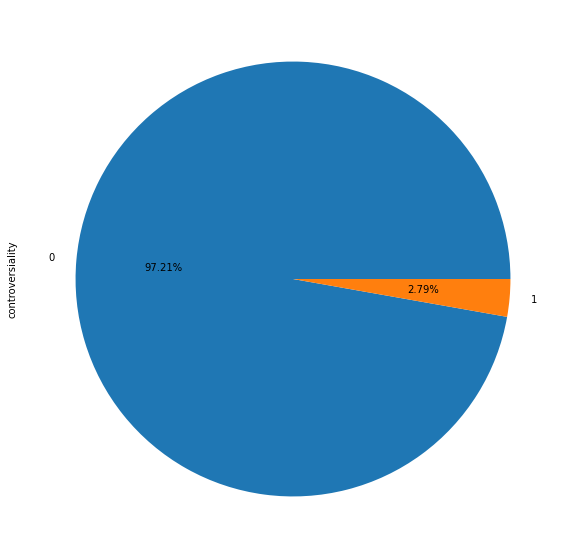

In [12]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

In [13]:
df[df['controversiality'].isna()]

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,total_awards_received,author_cakeday


# Converting Controversiality values and deleting unimportant rows

In [14]:
# Werte '0' in 0 umwandeln
df['controversiality'] = df['controversiality'].replace(0,'0')

# Werte '1' in 1 umwandeln
df['controversiality'] = df['controversiality'].replace(1,'1')

0    192797
1      5528
Name: controversiality, dtype: int64


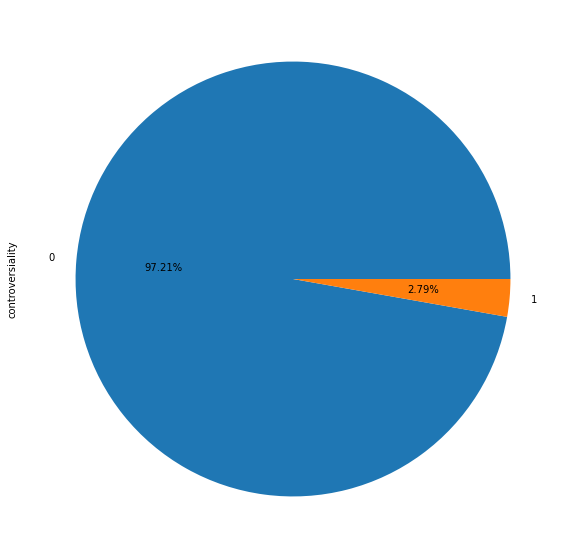

In [15]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

In [16]:
df["controversiality"].unique()

array(['0', '1'], dtype=object)

# Stickied

False    198325
Name: stickied, dtype: int64


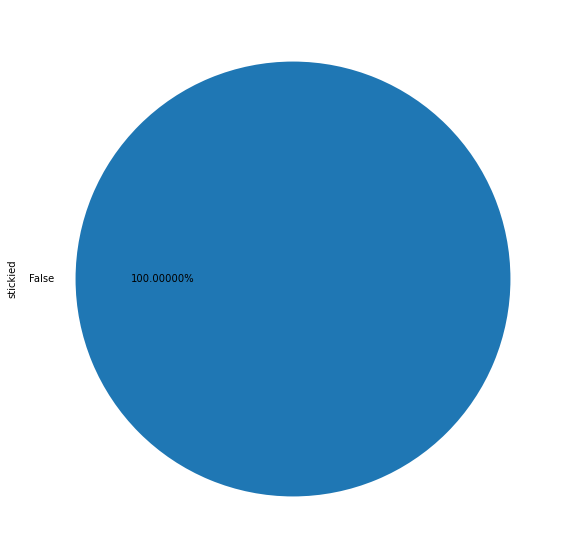

In [17]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.5f%%')
print(df["stickied"].value_counts())

In [18]:
df["stickied"].unique()

array([False])

In [19]:
df[df['stickied'].isna()] #falsch formatiert

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,total_awards_received,author_cakeday


In [20]:
df['stickied'] = df['stickied'].replace(False, "0")

0    198325
Name: stickied, dtype: int64


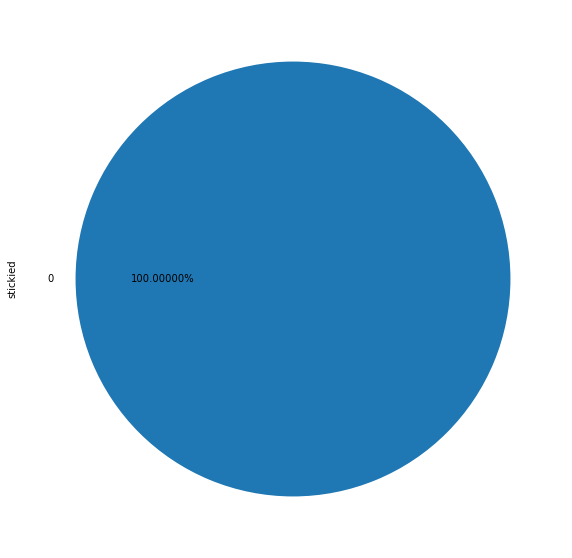

In [21]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.5f%%')
print(df["stickied"].value_counts())

In [22]:
df["stickied"].unique()

array(['0'], dtype=object)

# link_id

t3_dvf5s1    957
t3_dz6go1    942
t3_e02mzl    720
t3_duiqnh    660
t3_e1p4j8    646
            ... 
t3_dyb1ah      1
t3_dyb2t3      1
t3_bxkxdu      1
t3_dyb33n      1
t3_e45sc8      1
Name: link_id, Length: 21947, dtype: int64


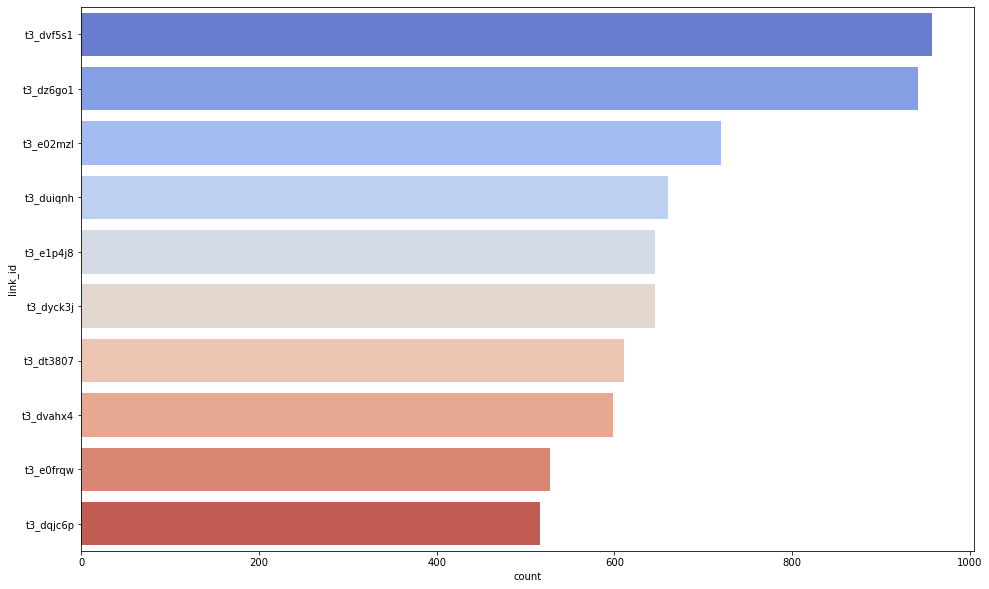

In [23]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:10].index)
print(df["link_id"].value_counts())

In [24]:
df[df['link_id'].isna()]

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,total_awards_received,author_cakeday


# Subreddit_id

t5_2qjvn    198325
Name: subreddit_id, dtype: int64


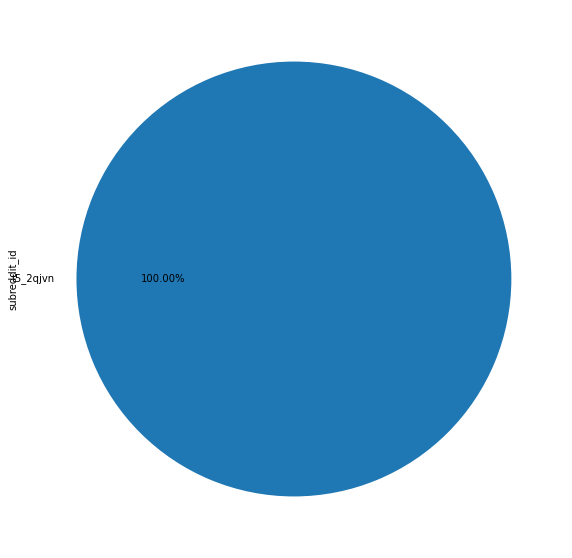

In [25]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["subreddit_id"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["subreddit_id"].value_counts()) 

In [26]:
df[df['subreddit_id'].isna()]

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,total_awards_received,author_cakeday


# Author

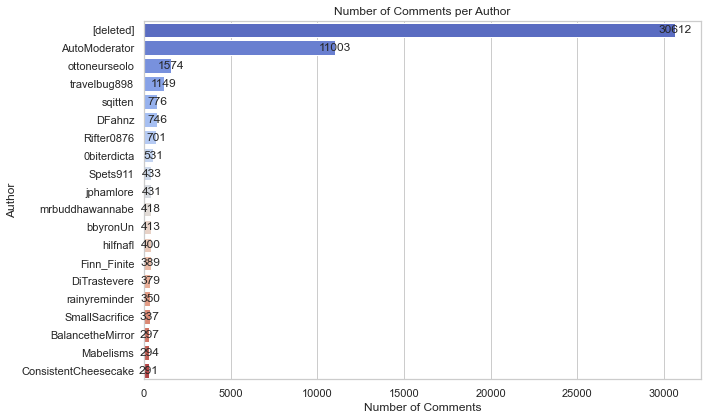

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits comments_new DataFrame mit einer "author" Spalte

# Top 5 Autoren nach Anzahl der Kommentare auswählen
top_authors = df['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen
top_comments = df[df['author'].isin(top_authors)]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha = 'center', va = 'center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
#automoderator löschen

In [28]:
 df[df['author'].str.contains('AutoModerator')]

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,total_awards_received,author_cakeday
58,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,1580512140,1,False,0,relationships,t5_2qjvn,r/relationships,public,0,NaN
70,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,1580512257,1,False,0,relationships,t5_2qjvn,r/relationships,public,0,NaN
81,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,1580512369,1,False,0,relationships,t5_2qjvn,r/relationships,public,0,NaN
94,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,1580512498,1,False,0,relationships,t5_2qjvn,r/relationships,public,0,NaN
97,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,1580512546,1,False,0,relationships,t5_2qjvn,r/relationships,public,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198193,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,1584149418,1,False,0,relationships,t5_2qjvn,r/relationships,public,0,NaN
198213,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,1584149533,1,False,0,relationships,t5_2qjvn,r/relationships,public,0,NaN
198218,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,1584149563,1,False,0,relationships,t5_2qjvn,r/relationships,public,0,NaN
198278,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,1584150165,1,False,0,relationships,t5_2qjvn,r/relationships,public,0,NaN


In [29]:
df[df['body'].str.startswith("The above", na=False)]

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,total_awards_received,author_cakeday
58,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,1580512140,1,False,0,relationships,t5_2qjvn,r/relationships,public,0,NaN
70,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,1580512257,1,False,0,relationships,t5_2qjvn,r/relationships,public,0,NaN
81,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,1580512369,1,False,0,relationships,t5_2qjvn,r/relationships,public,0,NaN
94,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,1580512498,1,False,0,relationships,t5_2qjvn,r/relationships,public,0,NaN
97,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,1580512546,1,False,0,relationships,t5_2qjvn,r/relationships,public,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198193,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,1584149418,1,False,0,relationships,t5_2qjvn,r/relationships,public,0,NaN
198213,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,1584149533,1,False,0,relationships,t5_2qjvn,r/relationships,public,0,NaN
198218,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,1584149563,1,False,0,relationships,t5_2qjvn,r/relationships,public,0,NaN
198278,[],NaN,AutoModerator,1.325741e+09,NaN,NaN,[],NaN,NaN,NaN,...,1584150165,1,False,0,relationships,t5_2qjvn,r/relationships,public,0,NaN


# Alle Automoderatoren löschen

In [30]:
df=df.drop(df[df['author'].str.contains('AutoModerator')].index)

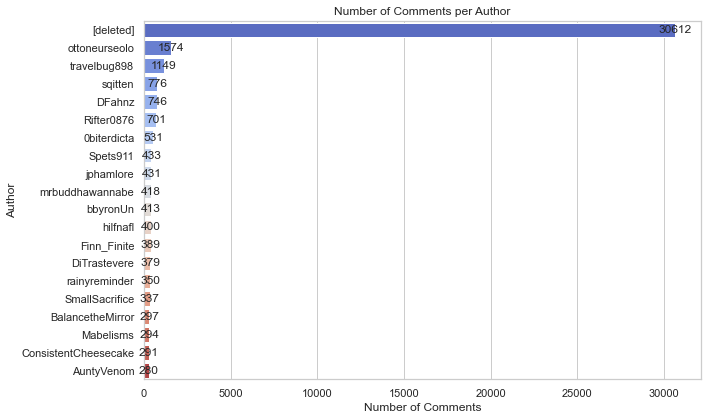

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits comments_new DataFrame mit einer "author" Spalte

# Top 5 Autoren nach Anzahl der Kommentare auswählen
top_authors = df['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen
top_comments = df[df['author'].isin(top_authors)]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha = 'center', va = 'center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
#automoderator löschen

#  Author flair text

In [32]:
df['author_flair_text'].fillna('0', inplace=True)

0    187322
Name: author_flair_text, dtype: int64


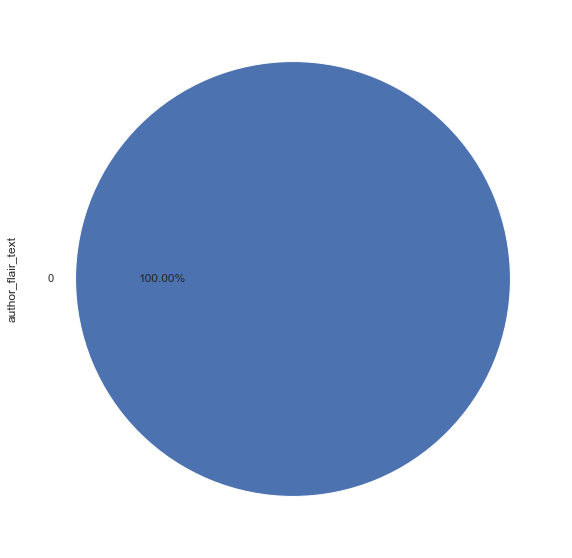

In [33]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["author_flair_text"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["author_flair_text"].value_counts()) 

# Subreddit

relationships    187322
Name: subreddit, dtype: int64


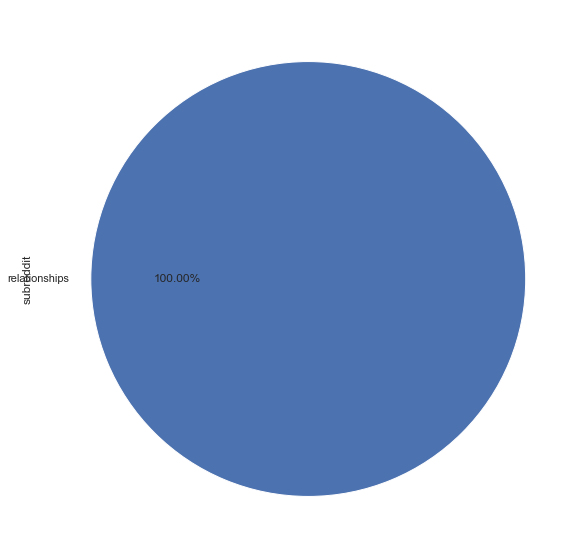

In [34]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["subreddit"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["subreddit"].value_counts())

In [35]:
df[df['subreddit'].isna()]

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,total_awards_received,author_cakeday


# Created_utc

In [36]:
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

In [37]:
df['created_utc']

0        2019-11-01 00:00:02
1        2019-11-01 00:00:56
2        2019-11-01 00:00:59
3        2019-11-01 00:01:00
4        2019-11-01 00:01:37
                 ...        
198320   2019-11-30 23:57:40
198321   2019-11-30 23:58:05
198322   2019-11-30 23:58:06
198323   2019-11-30 23:58:40
198324   2019-11-30 23:59:10
Name: created_utc, Length: 187322, dtype: datetime64[ns]

In [38]:
df[df['created_utc'].isna()]

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,total_awards_received,author_cakeday


# Hours

Text(0, 0.5, 'Anzahl der Kommentare')

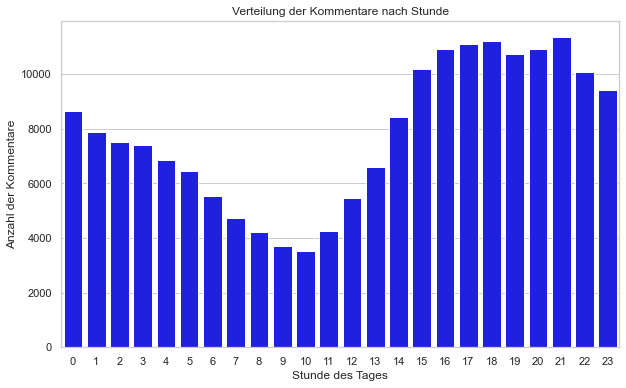

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
df['created_hour'] = pd.to_datetime(df['created_utc'], unit='s').dt.hour

# Erstelle das Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='created_hour', color='blue')

plt.title('Verteilung der Kommentare nach Stunde')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

# Days

Text(0, 0.5, 'Anzahl der Kommentare')

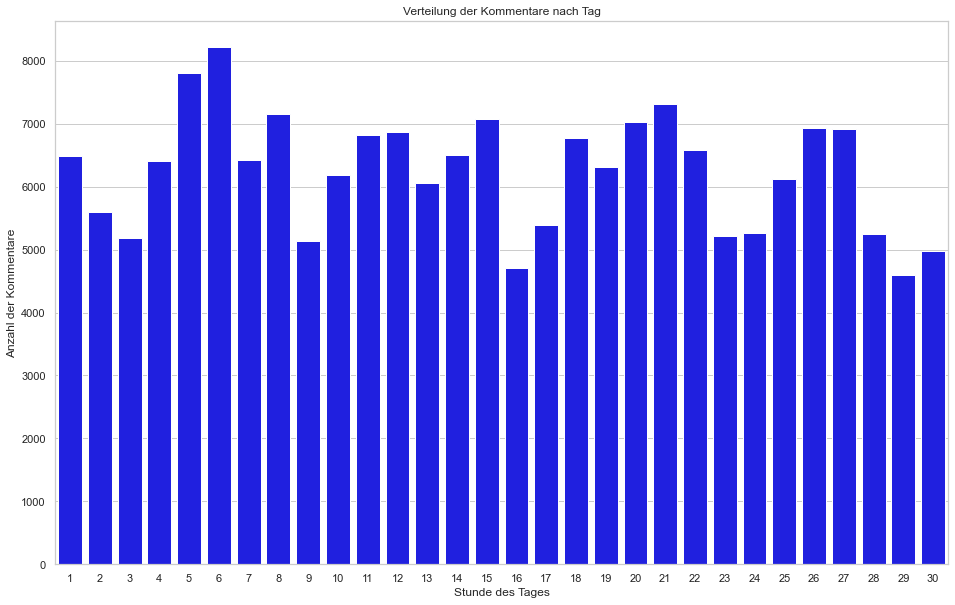

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
df['created_day'] = pd.to_datetime(df['created_utc'], unit='s').dt.day

# Erstelle das Countplot
fig = plt.figure(figsize=(16,10))
sns.countplot(data=df, x='created_day', color='blue')

plt.title('Verteilung der Kommentare nach Tag')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

# year

In [41]:
df['created_year'] = pd.to_datetime(df['created_utc'], unit='s').dt.year

In [73]:
df['created_year'].unique()

array([2019])

In [42]:
 df[pd.isna(df['created_day'])]

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,total_awards_received,author_cakeday,created_hour,created_day,created_year


# Gilded

0    187251
1        66
2         4
3         1
Name: gilded, dtype: int64


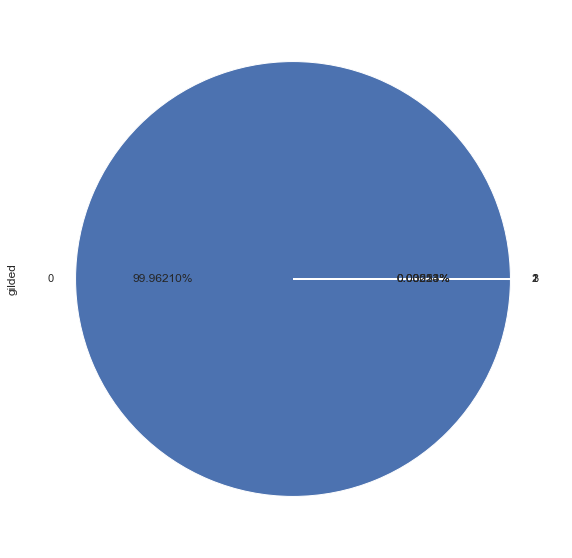

In [43]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.5f%%')
print(df["gilded"].value_counts())

In [44]:
df['gilded'] = df['gilded'].replace(0,"0")
df['gilded'] = df['gilded'].replace(1,"1")
df['gilded'] = df['gilded'].replace(2,"2")
df['gilded'] = df['gilded'].replace(3,"3")

0    187251
1        66
2         4
3         1
Name: gilded, dtype: int64


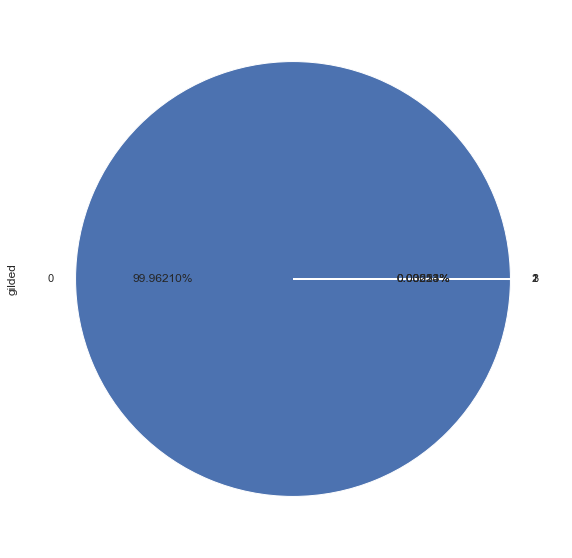

In [45]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.5f%%')
print(df["gilded"].value_counts())

In [46]:
df["gilded"].unique()

array(['0', '1', '3', '2'], dtype=object)

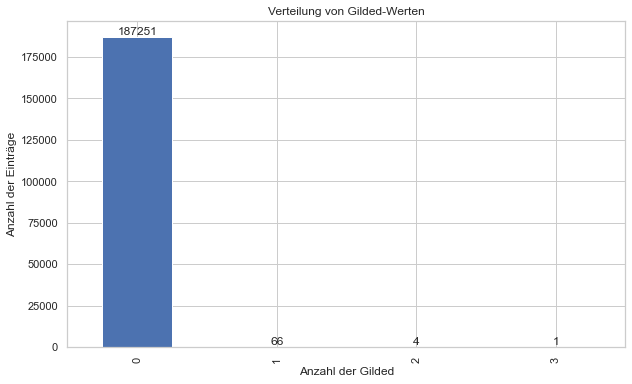

In [47]:
fig = plt.figure(figsize=(10, 6))
ax = df["gilded"].value_counts().plot(kind='bar')

# Optional: Beschriftungen und Titel hinzufügen
ax.set_xlabel('Anzahl der Gilded')
ax.set_ylabel('Anzahl der Einträge')
ax.set_title('Verteilung von Gilded-Werten')

# Anzahl der Werte über den Balken anzeigen
for i, v in enumerate(df["gilded"].value_counts()):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Distinguished

In [48]:
df['distinguished'].fillna('0', inplace=True)

0            187320
moderator         2
Name: distinguished, dtype: int64


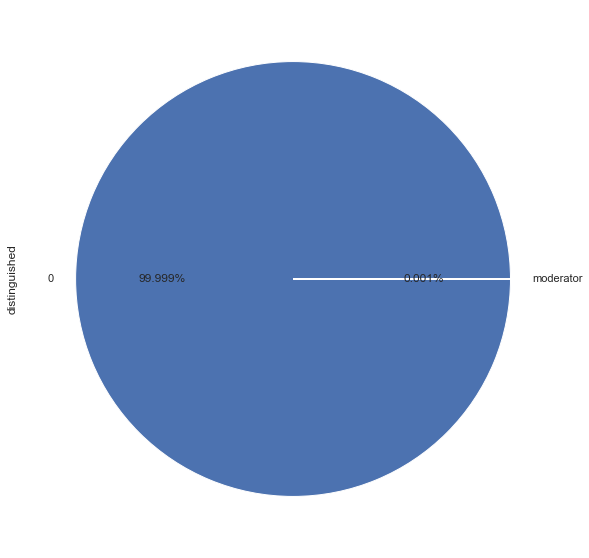

In [49]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["distinguished"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["distinguished"].value_counts())

In [50]:
df["distinguished"].unique()

array(['0', 'moderator'], dtype=object)

In [53]:
 df[df['distinguished'] == 'moderator']["body"]

9212              Thanks!
160132    Happy Birthday!
Name: body, dtype: object

# Edited

In [54]:
df["edited"].unique()

array(['False', '1574482471', '1572567997', ..., '1575173708',
       '1575173240', '1575159334'], dtype=object)

In [55]:
# Alle Zahlenwerte in der Spalte "edited" durch "1" ersetzen
df['edited'] = df['edited'].replace(to_replace=r'\d', value='1', regex=True)
df['edited'] = df['edited'].replace('1111111111', "1")
df['edited'] = df['edited'].replace('False', "0")

0    180675
1      6647
Name: edited, dtype: int64


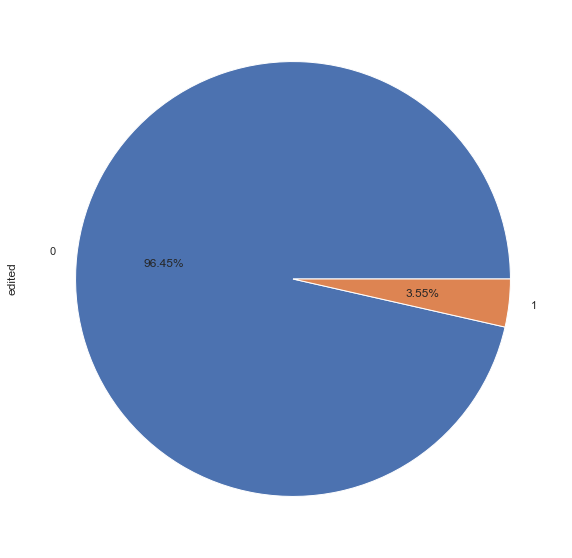

In [56]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df['edited'].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df['edited'].value_counts())

In [57]:
df[df['edited'].isna()]

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,total_awards_received,author_cakeday,created_hour,created_day,created_year


# Score

In [58]:
df["score"].value_counts()

 1       60549
 2       28554
 3       16472
 0        8354
 4        7636
         ...  
 2239        1
 1091        1
-112         1
 510         1
-108         1
Name: score, Length: 995, dtype: int64

In [59]:
df['score'] = df["score"].astype(int)

In [60]:
df["score"].mean()

12.116211656932983

In [61]:
df.describe()

,associated_award,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,collapsed_because_crowd_control,removal_reason,retrieved_on,score,total_awards_received,created_hour,created_day,created_year
count,0.0,1.060440e+05,0.0,0.0,0.0,0.0,0.0,1.873220e+05,187322.000000,187322.000000,187322.000000,187322.000000,187322.0
mean,NaN,1.460627e+09,NaN,NaN,NaN,NaN,NaN,1.582334e+09,12.116212,0.001548,12.859984,15.130428,2019.0
std,NaN,7.979720e+07,NaN,NaN,NaN,NaN,NaN,1.239577e+06,79.552318,0.048770,7.267858,8.505739,0.0
min,NaN,1.133586e+09,NaN,NaN,NaN,NaN,NaN,1.580511e+09,-356.000000,0.000000,0.000000,1.000000,2019.0
25%,NaN,1.408222e+09,NaN,NaN,NaN,NaN,NaN,1.581072e+09,1.000000,0.000000,6.000000,8.000000,2019.0
50%,NaN,1.481792e+09,NaN,NaN,NaN,NaN,NaN,1.581886e+09,2.000000,0.000000,15.000000,15.000000,2019.0
75%,NaN,1.529526e+09,NaN,NaN,NaN,NaN,NaN,1.583584e+09,6.000000,0.000000,19.000000,22.000000,2019.0
max,NaN,1.554090e+09,NaN,NaN,NaN,NaN,NaN,1.584151e+09,6951.000000,6.000000,23.000000,30.000000,2019.0


In [62]:
df.isnull().sum() 

all_awardings                           0
associated_award                   187322
author                                  0
author_created_utc                  81278
author_flair_background_color      187322
author_flair_css_class             187322
author_flair_richtext               30612
author_flair_template_id           187322
author_flair_text                       0
author_flair_text_color            156710
author_flair_type                   30612
author_fullname                     30612
author_patreon_flair                30612
author_premium                      30612
awarders                                0
body                                    0
can_gild                                0
can_mod_post                            0
collapsed                               0
collapsed_because_crowd_control    187322
collapsed_reason                   184743
controversiality                        0
created_utc                             0
distinguished                     

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187322 entries, 0 to 198324
Data columns (total 49 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   all_awardings                    187322 non-null  object        
 1   associated_award                 0 non-null       float64       
 2   author                           187322 non-null  object        
 3   author_created_utc               106044 non-null  float64       
 4   author_flair_background_color    0 non-null       float64       
 5   author_flair_css_class           0 non-null       float64       
 6   author_flair_richtext            156710 non-null  object        
 7   author_flair_template_id         0 non-null       float64       
 8   author_flair_text                187322 non-null  object        
 9   author_flair_text_color          30612 non-null   object        
 10  author_flair_type                156710 non-

# can_mod_post

False    187322
Name: can_mod_post, dtype: int64


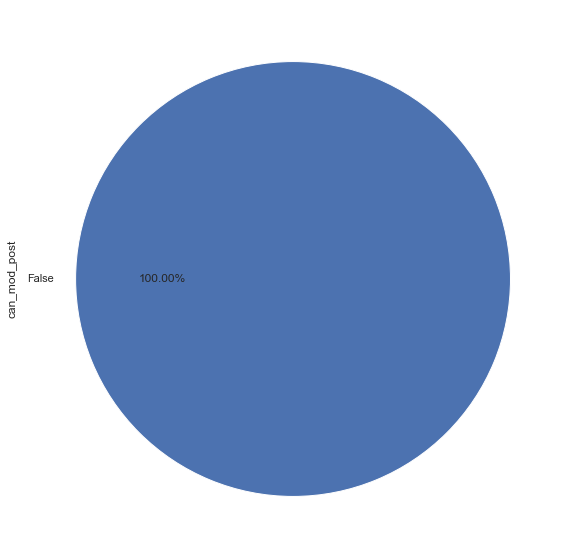

In [66]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df['can_mod_post'].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df['can_mod_post'].value_counts())

# Two Feature Analyses

# Hours vs score

<AxesSubplot:xlabel='created_hour', ylabel='score'>

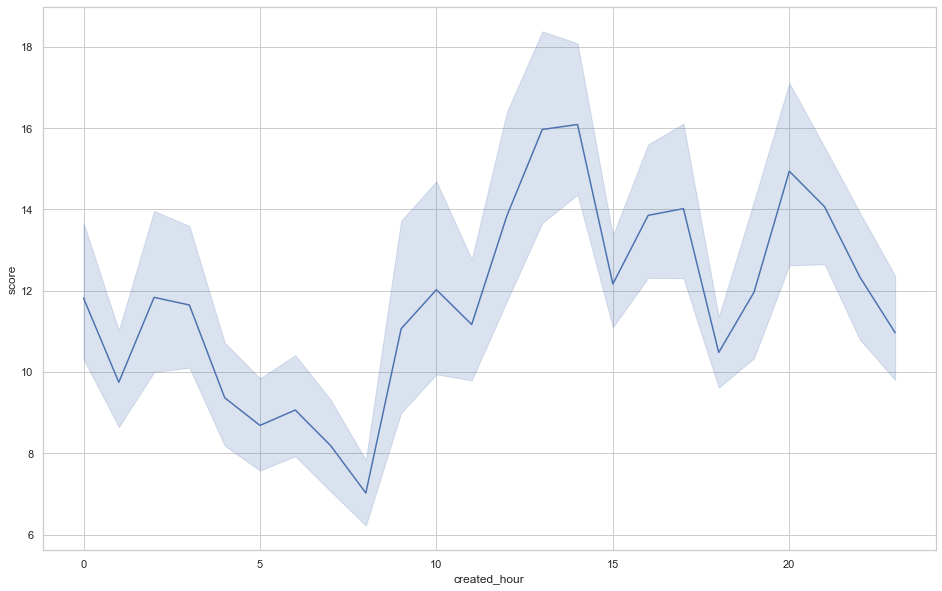

In [67]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_hour", y="score")

# Days vs score

<AxesSubplot:xlabel='created_day', ylabel='score'>

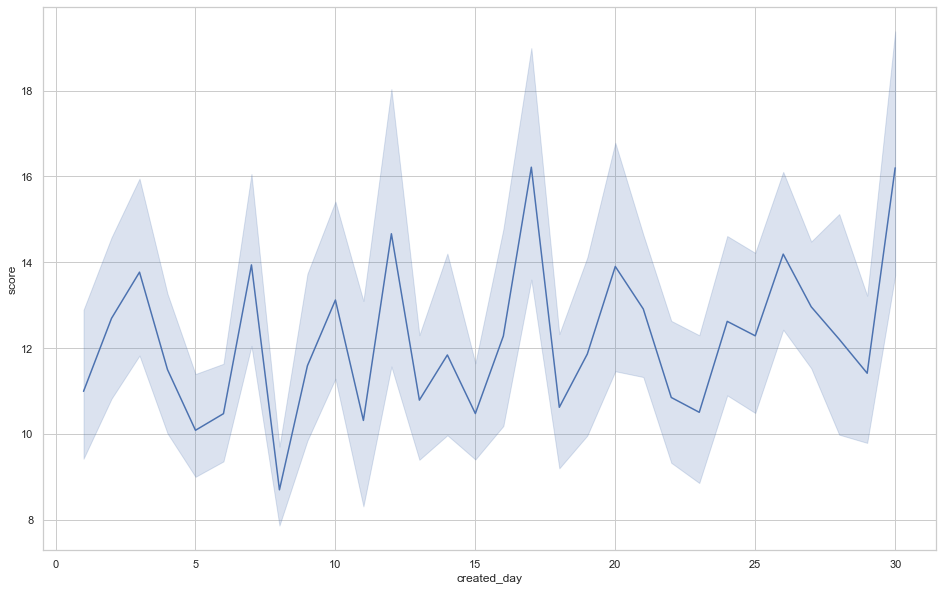

In [68]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_day", y="score")

# Which Author have the most scores

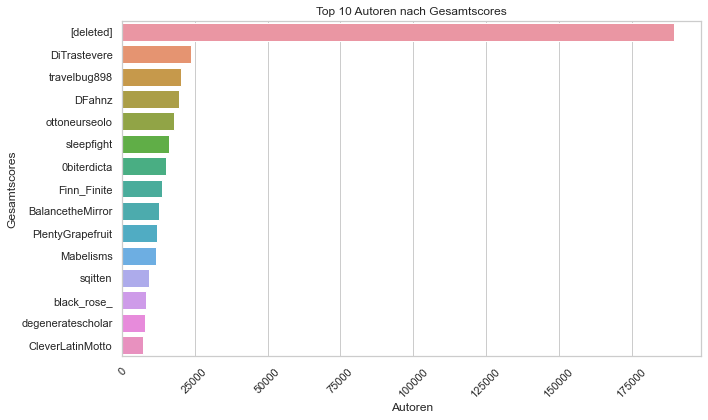

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren und die Top 10 auswählen
top_authors = author_scores.sort_values(ascending=False).head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 10 Autoren nach Gesamtscores')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()

# Ohne Deleted

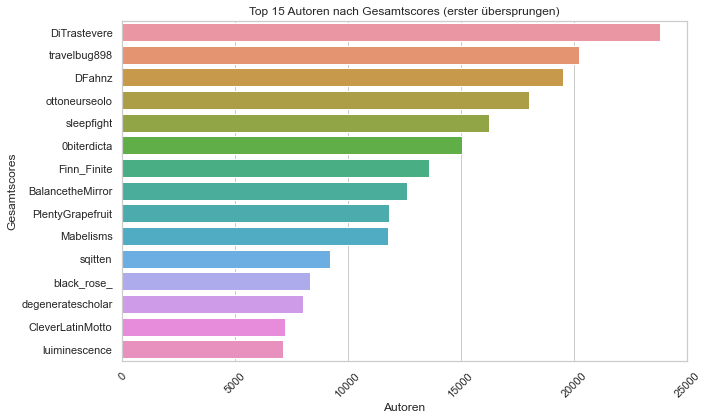

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten
# Stellen Sie sicher, dass Sie denselben DataFrame-Namen verwenden

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den ersten Autor aus der sortierten Liste entfernen
sorted_authors = sorted_authors.iloc[1:]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [72]:
df[df['author'] == 'travelbug898']["body"]

22011     No dude. "Testing" him is not how you build ba...
29528     If she isn't talking to you, then she almost c...
29575     Do you want your relationship to survive? Then...
29661     &gt; I have good reasons to be insecure that I...
29679     So, she never talked to you about not wanting ...
                                ...                        
196238    What are you doing to manage your anxiety? It'...
196247    You can't control the actions of other people ...
196370    Don't wear clothes you aren't comfortable wear...
196398    Why are you letting your boyfriend tell you wh...
196449    But he isn't there for you and you still aren'...
Name: body, Length: 1149, dtype: object

In [79]:
df.columns

Index(['all_awardings', 'associated_award', 'author', 'author_premium',
       'awarders', 'body', 'collapsed_because_crowd_control',
       'controversiality', 'created_utc', 'distinguished', 'edited', 'gilded',
       'id', 'link_id', 'locked', 'parent_id', 'quarantined', 'score',
       'stickied', 'total_awards_received', 'created_hour', 'created_day',
       'created_year'],
      dtype='object')

# Column removing

In [76]:
df=df.drop(["author_created_utc","author_flair_richtext","author_flair_template_id","author_flair_text_color","author_flair_type","author_fullname","author_patreon_flair","can_gild","gildings","is_submitter","no_follow","subreddit_name_prefixed","author_flair_css_class", "subreddit","retrieved_on","subreddit_id","is_submitter","subreddit_type","author_cakeday","permalink"], axis = 1)

In [78]:
df=df.drop(["author_flair_background_color","author_flair_text","can_mod_post","collapsed","collapsed_reason","removal_reason","send_replies"], axis = 1)

In [81]:
df=df.drop(["all_awardings","associated_award","author_premium","awarders","collapsed_because_crowd_control","locked","quarantined","total_awards_received"], axis = 1)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187322 entries, 0 to 198324
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   author            187322 non-null  object        
 1   body              187322 non-null  object        
 2   controversiality  187322 non-null  object        
 3   created_utc       187322 non-null  datetime64[ns]
 4   distinguished     187322 non-null  object        
 5   edited            187322 non-null  object        
 6   gilded            187322 non-null  object        
 7   id                187322 non-null  object        
 8   link_id           187322 non-null  object        
 9   parent_id         187322 non-null  object        
 10  score             187322 non-null  int64         
 11  stickied          187322 non-null  object        
 12  created_hour      187322 non-null  int64         
 13  created_day       187322 non-null  int64         
 14  crea

# Row Deleting

# Delete all comments that have a NA

In [83]:
df[pd.isna(df['body'])]

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [84]:
df.isnull().sum() 

author              0
body                0
controversiality    0
created_utc         0
distinguished       0
edited              0
gilded              0
id                  0
link_id             0
parent_id           0
score               0
stickied            0
created_hour        0
created_day         0
created_year        0
dtype: int64

# Body analyses and Pre Processing

[deleted]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               13437
[removed]                                                                                                                                                                                                                                                                                 

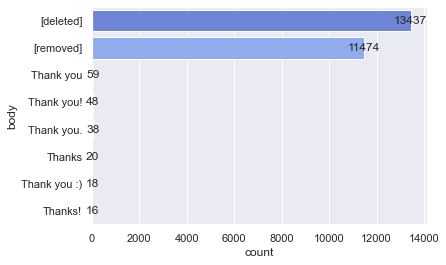

In [85]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

# Haben removed comments mehr likes

In [86]:
filtered_df=df[df['body'] == '[removed]']

In [87]:
filtered_df.describe()

,score,created_hour,created_day,created_year
count,11474.000000,11474.000000,11474.000000,11474.0
mean,3.065627,12.392365,15.231044,2019.0
std,38.893023,7.261256,8.737784,0.0
min,-218.000000,0.000000,1.000000,2019.0
25%,1.000000,5.000000,8.000000,2019.0
50%,1.000000,14.000000,15.000000,2019.0
75%,1.000000,19.000000,23.000000,2019.0
max,1994.000000,23.000000,30.000000,2019.0


Text(0.5, 1.0, 'Histogramm der Scores')

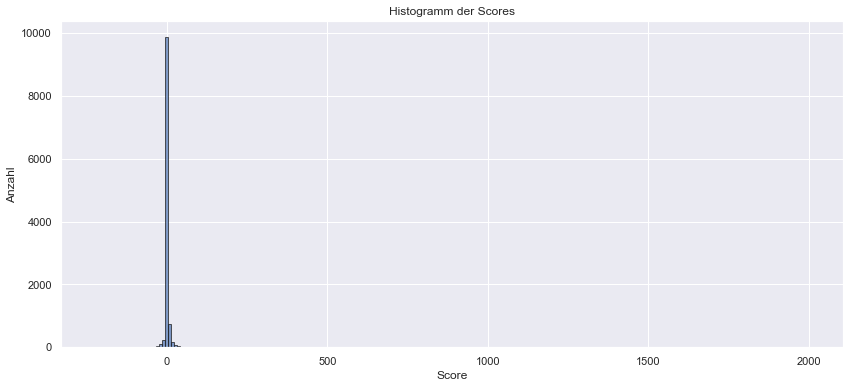

In [88]:
# Countplot für die "score"-Spalte erstellen
plt.figure(figsize=(14, 6))
plt.hist(filtered_df['score'], bins=240, edgecolor='k', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Anzahl')
plt.title('Histogramm der Scores')

Removed Kommentare löschen

In [89]:
df = df[df['body'] != '[removed]']

[deleted]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               13437
Thank you                                                                                                                                                                                                                                                                                 

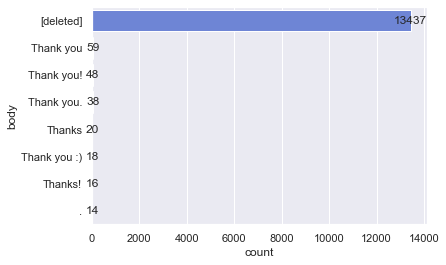

In [90]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

# Haben deleted comments mehr likes

In [91]:
filtered_df_del=df[df['body'] == '[deleted]']

In [92]:
filtered_df_del

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
10,[deleted],[deleted],0,2019-11-01 00:03:49,0,0,0,f5z43us,t3_dpvhu4,t3_dpvhu4,1,0,0,1,2019
18,[deleted],[deleted],0,2019-11-01 00:05:42,0,0,0,f5z4aa3,t3_dpljsu,t3_dpljsu,4,0,0,1,2019
20,[deleted],[deleted],0,2019-11-01 00:05:55,0,0,0,f5z4awr,t3_dpvi0w,t3_dpvi0w,1,0,0,1,2019
51,[deleted],[deleted],0,2019-11-01 00:14:32,0,0,0,f5z4y91,t3_dpnsci,t3_dpnsci,1,0,0,1,2019
59,[deleted],[deleted],0,2019-11-01 00:16:53,0,0,0,f5z54nz,t3_dpw9pr,t1_f5z4o79,1,0,0,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198231,[deleted],[deleted],0,2019-11-30 23:36:33,0,0,0,f971dhg,t3_e41i4z,t1_f96ne5b,11,0,23,30,2019
198265,[deleted],[deleted],0,2019-11-30 23:45:50,0,0,0,f97279j,t3_e41rd2,t3_e41rd2,1,0,23,30,2019
198271,[deleted],[deleted],0,2019-11-30 23:47:18,0,1,0,f972c00,t3_e45587,t3_e45587,4,0,23,30,2019
198277,[deleted],[deleted],0,2019-11-30 23:48:01,0,1,0,f972ecn,t3_e43pow,t3_e43pow,2,0,23,30,2019


In [93]:
filtered_df_del.describe()

,score,created_hour,created_day,created_year
count,13437.000000,13437.000000,13437.000000,13437.0
mean,7.249535,12.764977,15.257126,2019.0
std,64.000468,7.355200,8.501408,0.0
min,-356.000000,0.000000,1.000000,2019.0
25%,1.000000,6.000000,8.000000,2019.0
50%,1.000000,15.000000,15.000000,2019.0
75%,2.000000,19.000000,22.000000,2019.0
max,3244.000000,23.000000,30.000000,2019.0


In [94]:
len(filtered_df_del)

13437

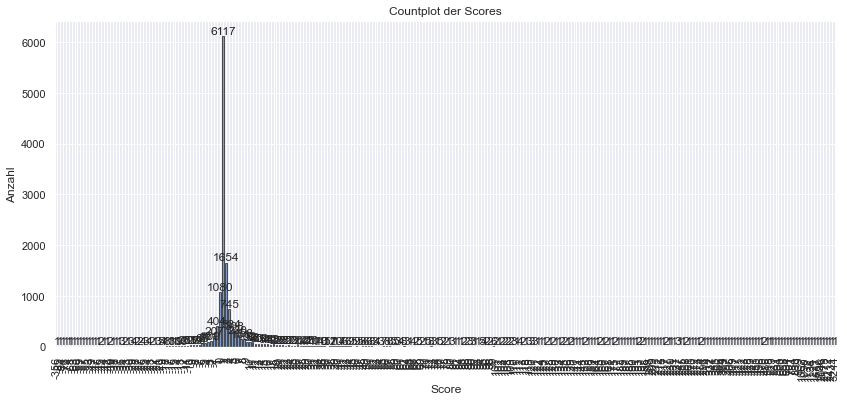

In [95]:
plt.figure(figsize=(14, 6))
counts = filtered_df_del['score'].value_counts().sort_index()
ax = counts.plot(kind='bar', edgecolor='k', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Anzahl')
plt.title('Countplot der Scores')

# Counts über den Balken anzeigen
for i, v in enumerate(counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

Kommentare die deleted wurden löschen

In [96]:
df = df[df['body'] != '[deleted]']

Thank you                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               59
Thank you!                                                                                                                                                                                                                                                                                   

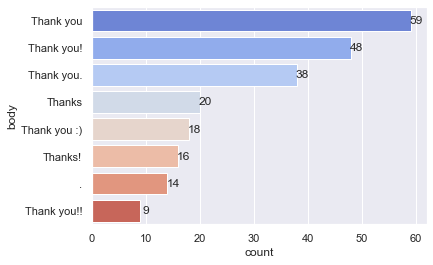

In [97]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

In [98]:
df = df[df['body'] != '.']

Thank you                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               59
Thank you!                                                                                                                                                                                                                                                                                   

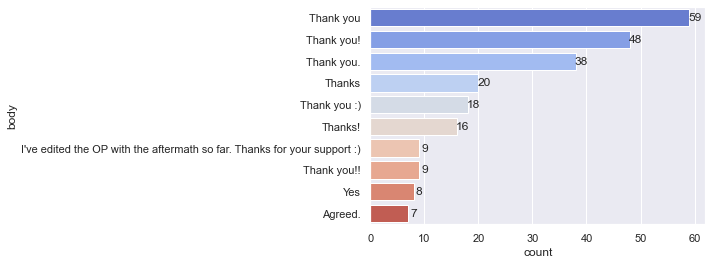

In [101]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:10].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

# Http und redditnames removen

# Löschen aller Authoren die AutoModeratoren sind

In [102]:
df = df.drop(df[df['author'] == 'AutoModerator'].index)

# Http und Redditnames removen

In [103]:
selected_sub_men=df[df['body'].str.fullmatch(r'/r/[^/\s]+')]
selected_sub_men

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
52949,[deleted],/r/nothingeverhappens,0,2019-11-08 16:17:26,0,0,0,f6wmafu,t3_dtf9bo,t1_f6wfgpv,1,0,16,8,2019


In [107]:
df = df.drop(selected_sub_men.index)

In [108]:
selected_sub_men_two=df[df['body'].str.fullmatch(r'r/[^/\s]+')]
selected_sub_men_two

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
84240,jlf83,r/suspiciouslyspecific,0,2019-11-13 04:52:05,0,0,0,f7dlvf8,t3_dvmkt9,t3_dvmkt9,8,0,4,13,2019
140783,skynyourin,r/femaledatingstrategy,0,2019-11-21 19:06:26,0,0,0,f88xd6p,t3_dzmn2m,t3_dzmn2m,2,0,19,21,2019
166068,lightninghazard,r/unexpectedhogwarts,0,2019-11-25 18:48:15,0,0,0,f8puxwn,t3_e1jv6u,t3_e1jv6u,2,0,18,25,2019
168161,GoHabsVa,r/ihadkidsandihatemylifenow,0,2019-11-26 01:05:32,0,0,0,f8r2hxv,t3_e1g2u8,t1_f8pme7s,0,0,1,26,2019


In [109]:
# Zeilen löschen, die der URL-Bedingung entsprechen
df = df.drop(selected_sub_men_two.index)

In [110]:
selected_rows = df[df['body'].str.match(r'^http://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [111]:
selected_rows_2 = df[df['body'].str.match(r'^https://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows_2

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [112]:
import re

# Regulärer Ausdruck zum Erfassen von Zeilen, die nur aus Links/URLs bestehen
url_pattern = r'^https?://[^\s/$.?#].[^\s]*$'

# Anwenden des regulären Ausdrucks auf die 'body'-Spalte
url_only_rows = df[df['body'].str.match(url_pattern, flags=re.IGNORECASE)]
url_only_rows

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
28917,searching4answrs,https://www.reddit.com/r/relationship_advice/c...,0,2019-11-05 14:09:26,0,0,0,f6lx227,t3_dryqtr,t1_f6lvxr0,4,0,14,5,2019
80895,[deleted],https://www.reddit.com/r/relationships/comment...,0,2019-11-12 19:31:46,0,0,0,f7c92rl,t3_dvcq9n,t1_f7c7y8p,2,0,19,12,2019


In [113]:
df.drop(url_only_rows.index, inplace=True)

# Delete Bots

In [114]:
helper_bot_rows = df[df['body'].str.startswith('Helper bot')]
helper_bot_rows 

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [115]:
import pandas as pd

# Annahme: Du hast bereits ein DataFrame mit dem Namen 'df'
# Wenn nicht, lade deine Daten zuerst in ein DataFrame

# Lösche Zeilen, in denen die Spalte 'body' mit 'Helper bot' beginnt
df = df[~df['body'].str.startswith('Helper bot')]

In [116]:
import re

bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]
bot_in_body_rows

/var/folders/88/lkbjvmyj48n6h04_m1x2v3km0000gn/T/ipykernel_65639/2615394462.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]


,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
3150,kaizye,Even if that's the case and you only ever orga...,0,2019-11-01 15:05:39,0,0,0,f60m8d9,t3_dq59eq,t1_f60llb6,2,0,15,1,2019
6355,sharmrp72,I am sorry but you need help from a profession...,0,2019-11-01 22:36:39,0,0,0,f61v32j,t3_dqbjb1,t3_dqbjb1,1,0,22,1,2019
30410,FullBitGamer,"Thanks, good bot.\nI know what brief means it...",0,2019-11-05 17:07:39,0,0,0,f6minww,t3_ds1ye8,t1_f6miixw,0,0,17,5,2019
30415,DFahnz,"Not a bot, just another user who made an idiot...",0,2019-11-05 17:08:13,0,0,0,f6miqlm,t3_ds1ye8,t1_f6minww,2,0,17,5,2019
32993,RodeoBob,&gt; Long term relationships are usually based...,0,2019-11-05 22:45:08,0,0,0,f6nl46z,t3_ds6lxv,t3_ds6lxv,0,0,22,5,2019
34477,Kholzie,I can certainly relate to your girlfriend beca...,0,2019-11-06 03:25:39,0,1,0,f6o92c9,t3_ds4t5y,t3_ds4t5y,8,0,3,6,2019
43344,t3hd0n,are you sure its not a bot?,0,2019-11-07 05:48:39,0,0,0,f6rix4w,t3_dst4g4,t3_dst4g4,2,0,5,7,2019
43623,metal_in_the_bone,Quite possibly a bot. I get followed by random...,0,2019-11-07 07:50:04,0,0,0,f6rooa2,t3_dst4g4,t3_dst4g4,2,0,7,7,2019
58836,pathofcollision,I have had numerous relationships where my SO ...,0,2019-11-09 14:17:50,0,0,0,f6z4wtw,t3_dtp2t1,t3_dtp2t1,3,0,14,9,2019
62317,hilfnafl,I'm a late boomer and I have to give you credi...,0,2019-11-10 01:47:26,0,0,0,f71yc97,t3_du0tqc,t1_f712wre,8,0,1,10,2019


In [117]:
df_bot=pd.read_csv("bot_names.csv")

In [118]:
df_bot["Bot Name"].values.tolist()

selection = df_bot["Bot Name"].values.tolist()
mask = df["author"].apply(lambda x: any(item for item in selection if item in x)) 

In [119]:
df_check_bot=df.filter(items = mask[mask].index, axis=0)

In [120]:
df_check_bot

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
99,loveshotbaths,Now flip the sexes and this is gross and omg t...,1,2019-11-01 00:27:56,0,0,0,f5z5ykd,t3_dptv0g,t3_dptv0g,-6,0,0,1,2019
319,Drewkon51,Normally I do not go for the easiest advice wh...,0,2019-11-01 01:36:32,0,0,0,f5zb9i4,t3_dpxc2s,t3_dpxc2s,12,0,1,1,2019
338,maxxmurrax,Younger brothers can be jerks. Don’t worry abo...,0,2019-11-01 01:41:05,0,0,0,f5zblu6,t3_dpxked,t3_dpxked,3,0,1,1,2019
401,michaelpaoli,He doesn't sound like reasonable boyfriend mat...,0,2019-11-01 02:04:03,0,0,0,f5zdc0r,t3_dprk9c,t3_dprk9c,2,0,2,1,2019
674,sprimax,quite honestly weight and looks is something t...,0,2019-11-01 03:18:25,0,0,0,f5zjapf,t3_dpsc84,t3_dpsc84,3,0,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198162,justpickadamnname,"I'm a lymphoma survivor, and was diagnosed whe...",0,2019-11-30 23:26:33,0,0,0,f970hwi,t3_e3yshz,t3_e3yshz,10,0,23,30,2019
198180,Pantone711,That's what I suspect too. They already had s...,0,2019-11-30 23:29:24,0,0,0,f970qup,t3_e41rd2,t1_f96vkve,200,0,23,30,2019
198237,Matias8823,I'd stop speaking to both of them. Your sister...,0,2019-11-30 23:38:59,0,0,0,f971lfz,t3_e41rd2,t3_e41rd2,1,0,23,30,2019
198251,justpickadamnname,I'd suggest just texting her frequently and ta...,0,2019-11-30 23:41:59,0,1,0,f971uye,t3_e3yshz,t1_f970zqu,8,0,23,30,2019


In [125]:
df_check_bot[df_check_bot['author'].str.contains('bot')]

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
2283,fannyrosebottom,"Great list! Also, make sure they can't block y...",0,2019-11-01 12:27:54,0,0,0,f60a3tf,t3_dpzgrp,t1_f5zrl0x,6,0,12,1,2019
8547,melsbotgm,First off...I got a strange vagina sits to far...,0,2019-11-02 07:26:12,0,0,0,f63lwbr,t3_dqcqzq,t3_dqcqzq,1,0,7,2,2019
22238,notarobot4932,But why does that matter?,1,2019-11-04 17:19:52,0,0,0,f6j25m0,t3_dri5p5,t1_f6j1nip,-2,0,17,4,2019
22294,notarobot4932,The fact that they care that much about things...,0,2019-11-04 17:28:04,0,0,0,f6j39ku,t3_dri5p5,t1_f6j31k7,10,0,17,4,2019
22852,notarobot4932,OP's girlfriend might if she's financially dep...,0,2019-11-04 18:55:04,0,0,0,f6jf0xf,t3_dri5p5,t1_f6jej17,5,0,18,4,2019
22858,notarobot4932,I actually have. I was more expressing frustra...,0,2019-11-04 18:56:39,0,0,0,f6jf8lr,t3_dri5p5,t1_f6jdwaq,5,0,18,4,2019
22864,notarobot4932,"But that's .....judging..... I mean I get it, ...",0,2019-11-04 18:57:44,0,0,0,f6jfe5g,t3_dri5p5,t1_f6j5bh9,3,0,18,4,2019
28728,melsbotgm,It won't matter. In a few months a few years y...,0,2019-11-05 13:35:24,0,0,0,f6lu4y4,t3_dry72e,t3_dry72e,2,0,13,5,2019
30743,dqmot-bot,&gt;Disclaimer: I personally think marriage is...,0,2019-11-05 17:45:05,0,0,0,f6mo0ws,t3_ds0w0r,t1_f6mo0g7,1,0,17,5,2019
45993,bendertehrobot,"Honestly if it was me I'd be happy you did, if...",0,2019-11-07 18:53:47,0,0,0,f6tqrus,t3_dszukr,t3_dszukr,-8,0,18,7,2019


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162390 entries, 0 to 198324
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   author            162390 non-null  object        
 1   body              162390 non-null  object        
 2   controversiality  162390 non-null  object        
 3   created_utc       162390 non-null  datetime64[ns]
 4   distinguished     162390 non-null  object        
 5   edited            162390 non-null  object        
 6   gilded            162390 non-null  object        
 7   id                162390 non-null  object        
 8   link_id           162390 non-null  object        
 9   parent_id         162390 non-null  object        
 10  score             162390 non-null  int64         
 11  stickied          162390 non-null  object        
 12  created_hour      162390 non-null  int64         
 13  created_day       162390 non-null  int64         
 14  crea

In [136]:
df.describe()

,score,created_hour,created_day,created_year
count,162390.000000,162390.000000,162390.000000,162390.0
mean,13.160047,12.900597,15.112458,2019.0
std,82.737975,7.259938,8.489532,0.0
min,-225.000000,0.000000,1.000000,2019.0
25%,1.000000,6.000000,8.000000,2019.0
50%,2.000000,15.000000,15.000000,2019.0
75%,6.000000,19.000000,22.000000,2019.0
max,6951.000000,23.000000,30.000000,2019.0


# NLP Deleting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("relationship_19_comments_EDA_clean.csv")

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162390 entries, 0 to 162389
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   author            162390 non-null  object
 1   body              162390 non-null  object
 2   controversiality  162390 non-null  int64 
 3   created_utc       162390 non-null  object
 4   distinguished     162390 non-null  object
 5   edited            162390 non-null  int64 
 6   gilded            162390 non-null  int64 
 7   id                162390 non-null  object
 8   link_id           162390 non-null  object
 9   parent_id         162390 non-null  object
 10  score             162390 non-null  int64 
 11  stickied          162390 non-null  int64 
 12  created_hour      162390 non-null  int64 
 13  created_day       162390 non-null  int64 
 14  created_year      162390 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 18.6+ MB


In [5]:
import redditcleaner
df['body'] = df['body'].map(redditcleaner.clean)

In [6]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import emoji

# Schritt 1: Emojis und Emoticons in Emojis umwandeln, aber Kleinbuchstaben beibehalten
def convert_emoticons_and_emojis(text):
    text = emoji.demojize(text)
    return text

# Schritt 2: Tokenisierung
nltk.download('punkt')

# Schritt 3: Entfernen von Stoppwörtern
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  # Verwenden Sie die passende Sprache

# Schritt 4: Entfernen von Sonderzeichen und URLs
def clean_text(text):
    # Entfernen von HTML-Tags
    text = re.sub(r'<.*?>', '', text)
    
    # Entfernen von URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'https\S+', '', text)
    
    # Entfernen von Zahlen
    text = re.sub('[0-9]+', '', text)
    
    text = re.sub(r'/r/[A-Za-z0-9_]+', '', text)
    text = re.sub(r'r/[A-Za-z0-9_]+', '', text) # mit subreddit löschen
    
    # Entfernen von Sonderzeichen außer Buchstaben, Zahlen und Punkten
    text = re.sub('[^A-Za-z0-9.]+', ' ', text)
    
    # Tokenisierung
    words = word_tokenize(text)
    
    # Entfernen von Stoppwörtern
    #words = [word for word in words if word not in stop_words]
    
    # Entfernen von leeren Wörtern
    words = [word for word in words if word.strip() != '']
    
    return ' '.join(words)

# Anwenden der Bereinigungsfunktion auf den Text in der Spalte 'body'
df['clean_text'] = df['body'].apply(lambda x: convert_emoticons_and_emojis(x))
df['clean_text'] = df['clean_text'].apply(clean_text)

# Anzeigen des resultierenden DataFrames
print(df[['body', 'clean_text']])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anthonyfernando/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anthonyfernando/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                     body  \
0       I’m a big advocate for dating apps. You learn ...   
1       Haha. Its not funny but glad to know im not al...   
2       You are already understanding that you made a ...   
3       "I asked him an incoccent question about a pai...   
4       It’s still scary to have a thing in you that h...   
...                                                   ...   
162385  So basically it’s all on OP to fix her shit an...   
162386  Dude, you dodged a bullet You do not want to t...   
162387  Right? This is exactly how my relationship wit...   
162388  I think a few people mentioned this already, b...   
162389  “you’re ruining x for me.” This is emotional b...   

                                               clean_text  
0       I m a big advocate for dating apps . You learn...  
1       Haha . Its not funny but glad to know im not a...  
2       You are already understanding that you made a ...  
3       I asked him an inco

In [7]:
df["comment_len"] = df["clean_text"].apply (lambda x: len(x.split()))

In [8]:
import pandas as pd

# Annahme: Du hast bereits ein DataFrame df erstellt

# Filtere die Zeilen, in denen "comment_len" den Wert 0 hat
filtered_df = df[df['comment_len'] == 0]

# Jetzt enthält filtered_df nur die Zeilen, in denen "comment_len" den Wert 0 hat
filtered_df

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
18025,focat,,0,2019-11-04 17:01:49,0,0,0,f6izqcu,t3_drkdmj,t3_drkdmj,5,0,17,4,2019,,0
38976,_Yeezus_H_Christ,3,0,2019-11-07 21:41:20,0,0,0,f6uh8zv,t3_dt136i,t1_f6uh5kf,28,0,21,7,2019,,0
40003,WhiteCrayon94,,0,2019-11-07 23:49:18,0,0,0,f6uwopp,t3_dt1i3c,t1_f6u6jhy,7,0,23,7,2019,,0
46022,ThrowRA768578,16,0,2019-11-08 22:55:20,0,0,0,f6xnu42,t3_dtmxx9,t1_f6xnkxw,1,0,22,8,2019,,0
48856,nightfevernewton,Вы должны отправить ее в Сибирь,0,2019-11-09 16:04:59,0,0,0,f6zea7g,t3_dtwn0s,t3_dtwn0s,1,0,16,9,2019,,0
49691,alecp1,https://www.reddit.com/r/relationship_advice/c...,0,2019-11-09 19:39:08,0,0,0,f70h4hk,t3_du0lre,t3_du0lre,1,0,19,9,2019,,0
51129,alecp1,,0,2019-11-10 01:41:11,0,0,0,f71xjaw,t3_du53vk,t3_du53vk,48,0,1,10,2019,,0
55016,AFunnyIntrovert,?,0,2019-11-10 20:13:14,0,0,0,f75mfrb,t3_du8xnj,t1_f73zla8,1,0,20,10,2019,,0
57901,1Operator,/r/socialskills /r/dating_advice /r/seduction,0,2019-11-11 07:16:06,0,0,0,f77h7r2,t3_duotnb,t3_duotnb,1,0,7,11,2019,,0
66265,houseofwolves2901,?,0,2019-11-12 19:01:26,0,0,0,f7c671m,t3_dron6q,t1_f7brd76,1,0,19,12,2019,,0


In [9]:
df = df[df['comment_len'] != 0]

# Final EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162369 entries, 0 to 162389
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   author            162369 non-null  object
 1   body              162369 non-null  object
 2   controversiality  162369 non-null  int64 
 3   created_utc       162369 non-null  object
 4   distinguished     162369 non-null  object
 5   edited            162369 non-null  int64 
 6   gilded            162369 non-null  int64 
 7   id                162369 non-null  object
 8   link_id           162369 non-null  object
 9   parent_id         162369 non-null  object
 10  score             162369 non-null  int64 
 11  stickied          162369 non-null  int64 
 12  created_hour      162369 non-null  int64 
 13  created_day       162369 non-null  int64 
 14  created_year      162369 non-null  int64 
 15  clean_text        162369 non-null  object
 16  comment_len       162369 non-null  int

In [11]:
df.describe()

,controversiality,edited,gilded,score,stickied,created_hour,created_day,created_year,comment_len
count,162369.000000,162369.000000,162369.000000,162369.000000,162369.0,162369.000000,162369.000000,162369.0,162369.000000
mean,0.029390,0.027142,0.000474,13.161053,0.0,12.900726,15.112398,2019.0,73.416323
std,0.168897,0.162497,0.023669,82.743180,0.0,7.259889,8.489592,0.0,81.755785
min,0.000000,0.000000,0.000000,-225.000000,0.0,0.000000,1.000000,2019.0,1.000000
25%,0.000000,0.000000,0.000000,1.000000,0.0,6.000000,8.000000,2019.0,24.000000
50%,0.000000,0.000000,0.000000,2.000000,0.0,15.000000,15.000000,2019.0,48.000000
75%,0.000000,0.000000,0.000000,6.000000,0.0,19.000000,22.000000,2019.0,93.000000
max,1.000000,1.000000,3.000000,6951.000000,0.0,23.000000,30.000000,2019.0,2074.000000


In [12]:
df.head()

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
0,desaparecidose,I’m a big advocate for dating apps. You learn ...,0,2019-11-01 00:00:02,0,0,0,f5z3psi,t3_dpw8r0,t3_dpw8r0,3,0,0,1,2019,I m a big advocate for dating apps . You learn...,20
1,mainshkweez,Haha. Its not funny but glad to know im not al...,0,2019-11-01 00:00:56,0,0,0,f5z3tba,t3_dpu8ys,t3_dpu8ys,1,0,0,1,2019,Haha . Its not funny but glad to know im not a...,73
2,Roccet_MS,You are already understanding that you made a ...,0,2019-11-01 00:00:59,0,0,0,f5z3tie,t3_dpv4yr,t3_dpv4yr,3,0,0,1,2019,You are already understanding that you made a ...,96
3,stephowl,"""I asked him an incoccent question about a pai...",0,2019-11-01 00:01:00,0,0,0,f5z3tj0,t3_dpq6it,t3_dpq6it,4,0,0,1,2019,I asked him an incoccent question about a pain...,100
4,AMerrickanGirl,It’s still scary to have a thing in you that h...,0,2019-11-01 00:01:37,0,0,0,f5z3vuc,t3_dpvaib,t1_f5yxycd,1,0,0,1,2019,It s still scary to have a thing in you that h...,16


In [13]:
df.tail()

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
162385,Kylock__,So basically it’s all on OP to fix her shit an...,0,2019-11-30 23:57:40,0,0,0,f9738k4,t3_e41rd2,t1_f972cn4,67,0,23,30,2019,So basically it s all on OP to fix her shit an...,35
162386,danx1000,"Dude, you dodged a bullet You do not want to t...",0,2019-11-30 23:58:05,0,0,0,f9739wd,t3_e40amy,t3_e40amy,1,0,23,30,2019,Dude you dodged a bullet You do not want to ti...,53
162387,ErgonomicCat,Right? This is exactly how my relationship wit...,0,2019-11-30 23:58:06,0,0,0,f9739x6,t3_e45doo,t1_f9700cm,2,0,23,30,2019,Right This is exactly how my relationship with...,58
162388,thewordofrob,"I think a few people mentioned this already, b...",0,2019-11-30 23:58:40,0,0,0,f973bmp,t3_e43q3f,t3_e43q3f,2,0,23,30,2019,I think a few people mentioned this already bu...,88
162389,bicep123,“you’re ruining x for me.” This is emotional b...,0,2019-11-30 23:59:10,0,1,0,f973d69,t3_e44b3g,t3_e44b3g,2,0,23,30,2019,you re ruining x for me . This is emotional bl...,52


# Controversialty

In [14]:
df['controversiality'] = df['controversiality'].replace(0,False)
df['controversiality'] = df['controversiality'].replace(1,True)

False    157597
True       4772
Name: controversiality, dtype: int64


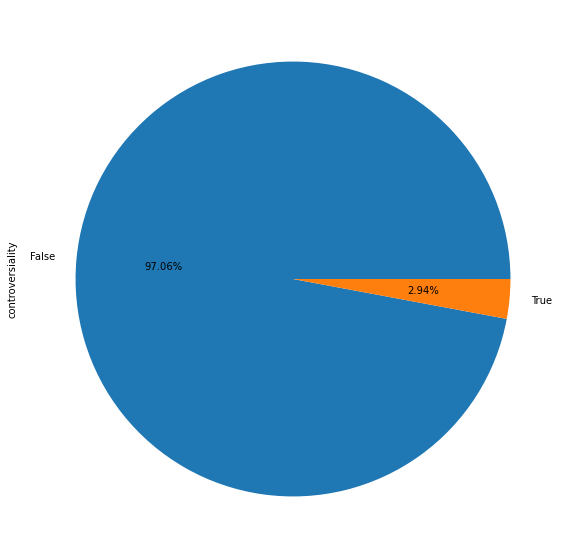

In [15]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

# Stickied

In [16]:
df['stickied'] = df['stickied'].replace(0,False)

False    162369
Name: stickied, dtype: int64


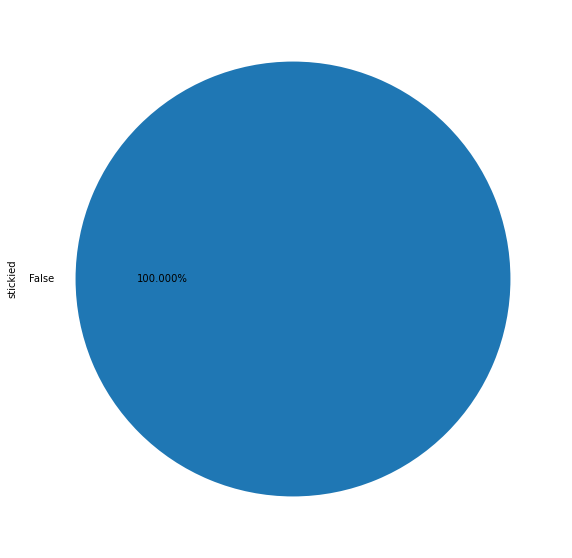

In [17]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["stickied"].value_counts())

# link_id

t3_dz6go1    810
t3_dvf5s1    808
t3_e02mzl    627
t3_dyck3j    586
t3_duiqnh    539
            ... 
t3_dslkzg      1
t3_e2k3pq      1
t3_dwyt4v      1
t3_e2kd4x      1
t3_e45sc8      1
Name: link_id, Length: 11006, dtype: int64


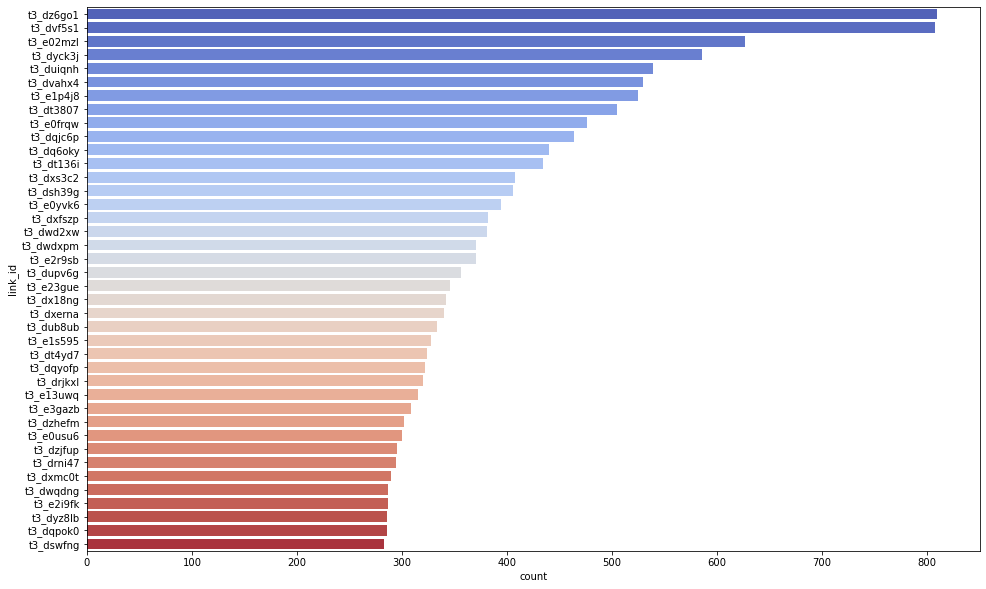

In [18]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:40].index)
print(df["link_id"].value_counts())

In [19]:
total_submissions = df['link_id'].nunique()

# Das Ergebnis anzeigen
print(f'Gesamtanzahl der Einreichungen (Submissions): {total_submissions}')

Gesamtanzahl der Einreichungen (Submissions): 11006


# Author

<AxesSubplot:xlabel='count', ylabel='author'>

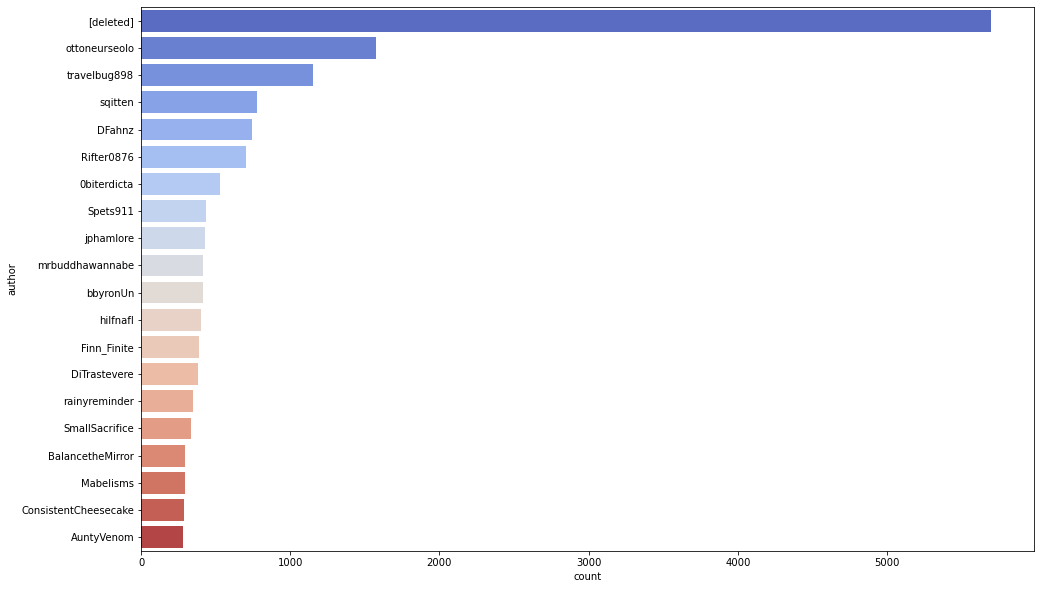

In [20]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="author", data=df, palette="coolwarm",
              order=df.author.value_counts().iloc[:20].index)

# Ohne Deleted

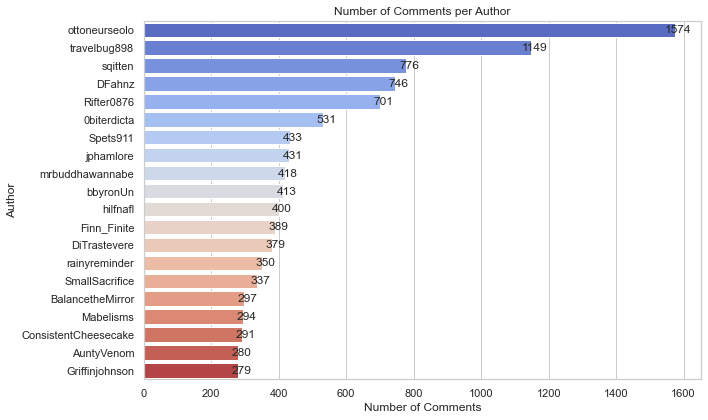

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits ein DataFrame mit einer "author" Spalte (z.B., df)

# Top 5 Autoren nach Anzahl der Kommentare auswählen und "[deleted]" entfernen
top_authors = df[df['author'] != '[deleted]']['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen (ohne "[deleted]")
top_comments = df[(df['author'].isin(top_authors)) & (df['author'] != '[deleted]')]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha='center', va='center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
plt.show()

In [22]:
# Group by "link_id" and count the number of comments per submission
submission_comment_counts = df.groupby('link_id')['body'].count()

# Calculate the average number of comments per submission
average_comments_per_submission = submission_comment_counts.mean()

# Display the result
print(f'Average number of comments per submission: {average_comments_per_submission:.2f}')

Average number of comments per submission: 14.75


In [23]:
# Group by "author" and count the number of comments per author
author_comment_counts = df.groupby('author')['body'].count()

# Calculate the average number of comments per author
average_comments_per_author = author_comment_counts.mean()

# Display the result
print(f'Average number of comments per author: {average_comments_per_author:.2f}')

Average number of comments per author: 4.73


# Hours

([<matplotlib.axis.XTick at 0x7f8d69cac1f0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

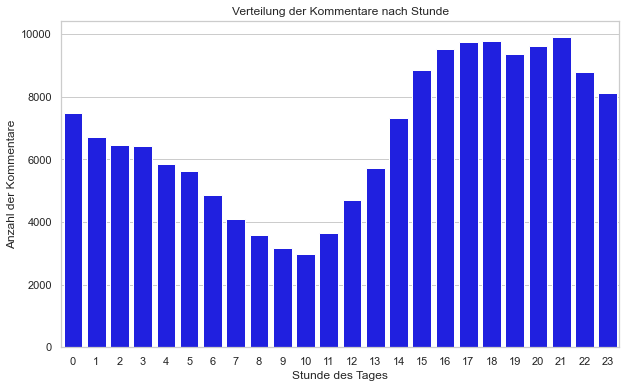

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
#df['created_hour'] = pd.to_datetime(df['created_utc'], unit='s').dt.hour

# Erstelle das Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='created_hour', color='blue')

plt.title('Verteilung der Kommentare nach Stunde')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')
plt.xticks(range(24))  # Setze x-Achse auf Stunden

# Days

Text(0, 0.5, 'Anzahl der Kommentare')

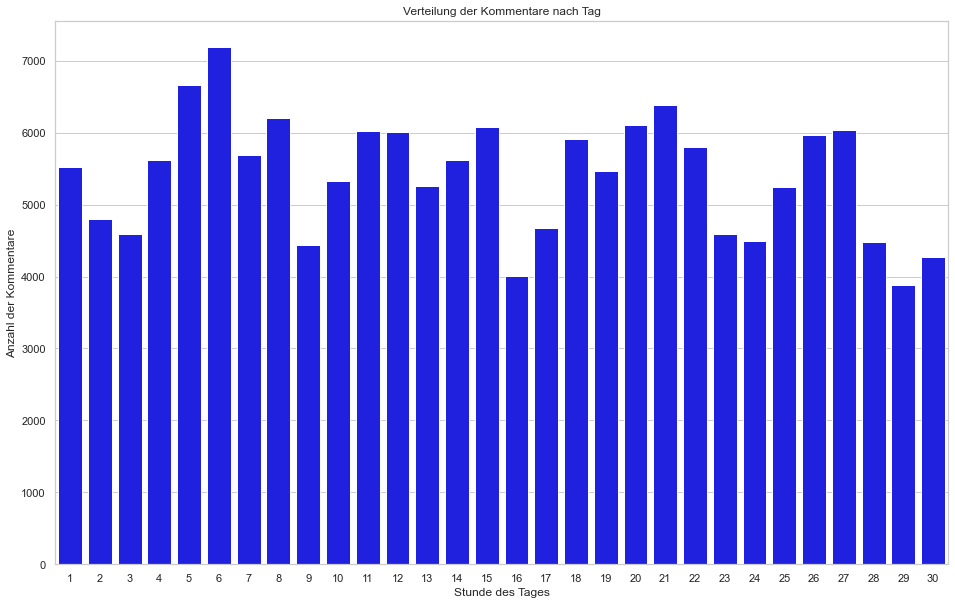

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"

# Erstelle das Countplot
fig = plt.figure(figsize=(16,10))
sns.countplot(data=df, x='created_day', color='blue')

plt.title('Verteilung der Kommentare nach Tag')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

# Gilded

0    162298
1        66
2         4
3         1
Name: gilded, dtype: int64


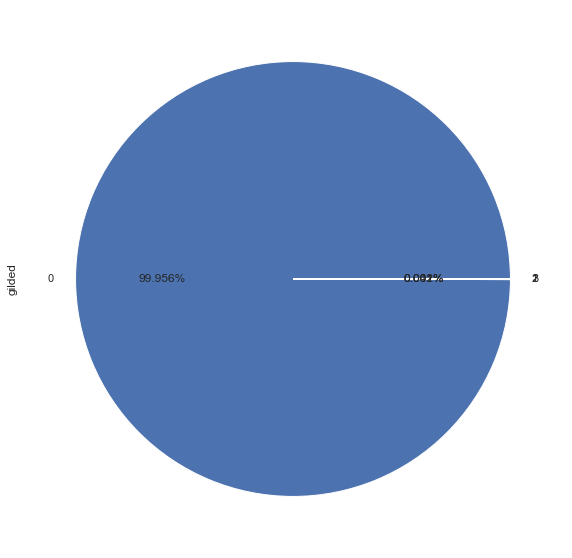

In [27]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["gilded"].value_counts())

# Distinguised

In [28]:
df["distinguished"] = df["distinguished"].replace(0,"0")
df["distinguished"] = df["distinguished"].replace("0",False)

False        162367
moderator         2
Name: distinguished, dtype: int64


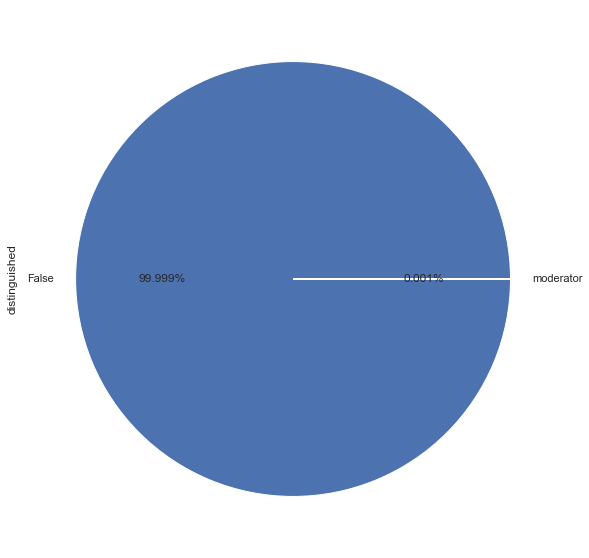

In [29]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["distinguished"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["distinguished"].value_counts())

# Edited

In [30]:
df['edited'] = df['edited'].replace(0,"0")
df['edited'] = df['edited'].replace(1,"1")
df['edited'] = df['edited'].replace("0",False)
df['edited'] = df['edited'].replace("1",True)

False    157962
True       4407
Name: edited, dtype: int64


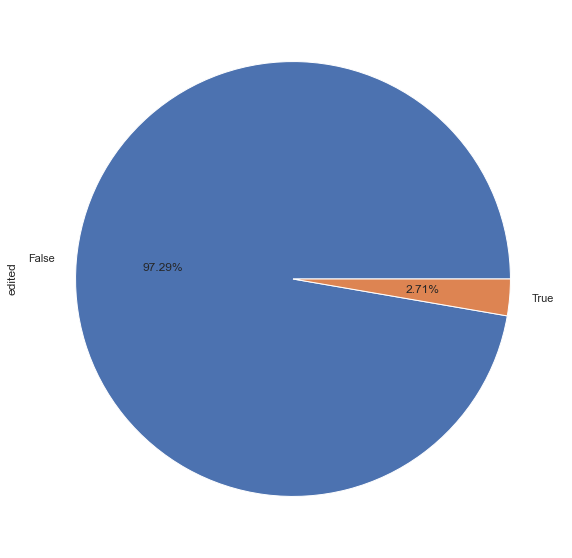

In [31]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["edited"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["edited"].value_counts())

# Score

In [32]:
df["score"].mean()

13.161052910346188

In [33]:
top_10_scores = df.nlargest(10, 'score')
top_10_scores

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
56697,luiminescence,You're lucky in many ways that you've got a ve...,False,2019-11-11 02:26:28,False,False,0,f76yl3l,t3_duiqnh,t3_duiqnh,6951,False,2,11,2019,You re lucky in many ways that you ve got a ve...,23
66674,PlentyGrapefruit,make herself look good None of this makes her ...,False,2019-11-12 20:06:08,False,False,0,f7ccd84,t3_dvf5s1,t3_dvf5s1,6806,False,20,12,2019,make herself look good None of this makes her ...,12
152770,black_rose_,"To answer your specific question, which no one...",False,2019-11-28 17:17:48,False,False,1,f8zja0r,t3_e30c1l,t3_e30c1l,5710,False,17,28,2019,To answer your specific question which no one ...,313
109626,captainslowww,"Whenever a roommate asks for this, they don't ...",False,2019-11-20 19:35:58,False,False,0,f85mr64,t3_dz6go1,t3_dz6go1,5589,False,19,20,2019,Whenever a roommate asks for this they don t r...,27
109738,Brooklyn_Bunny,Sounds like your BF’s roommate wants you to st...,False,2019-11-20 19:50:49,False,False,0,f85o7w8,t3_dz6go1,t3_dz6go1,5293,False,19,20,2019,Sounds like your BF s roommate wants you to st...,14
66894,sleepfight,I think rather than framing this as anything t...,False,2019-11-12 20:39:44,False,False,1,f7cfksi,t3_dvf5s1,t3_dvf5s1,5081,False,20,12,2019,I think rather than framing this as anything t...,134
99816,sleepfight,"Nope, nope, nope. He is not entitled to your b...",False,2019-11-19 00:42:41,False,False,0,f80aaq8,t3_dyck3j,t3_dyck3j,4697,False,0,19,2019,Nope nope nope . He is not entitled to your ba...,72
55725,charliekindafine,He literally said y'all have no future and he ...,False,2019-11-10 22:42:17,False,False,0,f76agjj,t3_duiqnh,t3_duiqnh,4369,False,22,10,2019,He literally said y all have no future and he ...,24
92811,rootsandchalice,What an asshole. Sorry. But your brother just ...,False,2019-11-17 20:38:53,False,False,0,f7vf0wr,t3_dxs3c2,t3_dxs3c2,4255,False,20,17,2019,What an asshole . Sorry . But your brother jus...,54
158788,Finn_Finite,"""I'm just too overwhelmed and I don't think I ...",False,2019-11-30 03:57:56,False,False,0,f94f4hd,t3_e3q9bo,t3_e3q9bo,4249,False,3,30,2019,I m just too overwhelmed and I don t think I c...,26


In [34]:
bottom_10_scores = df.nsmallest(10, 'score')
bottom_10_scores

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
104381,Agreeable-Spare,"With all due respect, as i said up there, i do...",False,2019-11-19 21:28:07,False,False,0,f82v9fm,t3_dyqnv6,t1_f82v1w8,-225,False,21,19,2019,With all due respect as i said up there i dont...,52
37384,OutsideBobcat8,"I didn't tackle her though, like you would in ...",False,2019-11-07 17:57:19,False,False,0,f6tijau,t3_dszukr,t1_f6t9lik,-211,False,17,7,2019,I didn t tackle her though like you would in r...,51
104488,Agreeable-Spare,guys have tendencies to get what they want. i ...,False,2019-11-19 21:44:34,False,False,0,f82x1tn,t3_dyqnv6,t1_f82weec,-185,False,21,19,2019,guys have tendencies to get what they want . i...,35
37334,OutsideBobcat8,"I didn't tackle her though, like you would in ...",False,2019-11-07 17:48:11,False,False,0,f6th962,t3_dszukr,t1_f6teccs,-175,False,17,7,2019,I didn t tackle her though like you would in r...,51
104302,Agreeable-Spare,"I understand, but my daughter is a very ""secre...",False,2019-11-19 21:15:41,False,False,0,f82tx7a,t3_dyqnv6,t1_f82thk7,-175,False,21,19,2019,I understand but my daughter is a very secreti...,73
1760,Von_Wallenstein,Maybe try talking to them first see what try h...,False,2019-11-01 12:34:58,False,True,0,f60ak3w,t3_dpzgrp,t1_f5zp0jq,-167,False,12,1,2019,Maybe try talking to them first see what try h...,88
133281,CKFS87,So many snarky answers. Give the dad a chance....,False,2019-11-25 02:46:32,False,False,0,f8npy6d,t3_e13uwq,t1_f8no42v,-163,False,2,25,2019,So many snarky answers . Give the dad a chance...,28
43779,[deleted],I think it was more naive and reckless on his ...,False,2019-11-08 16:58:11,False,False,0,f6wq2vc,t3_dtgxw2,t1_f6wpd9n,-158,False,16,8,2019,I think it was more naive and reckless on his ...,169
138748,tooMUCHOj,Excuse me? Building a shed and refurbishing ol...,False,2019-11-26 03:26:25,False,False,0,f8rf204,t3_e1p4j8,t1_f8r66a1,-153,False,3,26,2019,Excuse me Building a shed and refurbishing old...,53
58508,GemelloBello,Fuck this. You don't force the man you love to...,False,2019-11-11 12:00:46,False,False,0,f77sbm9,t3_duh36p,t1_f770lka,-140,False,12,11,2019,Fuck this . You don t force the man you love t...,34


<AxesSubplot:xlabel='created_hour', ylabel='score'>

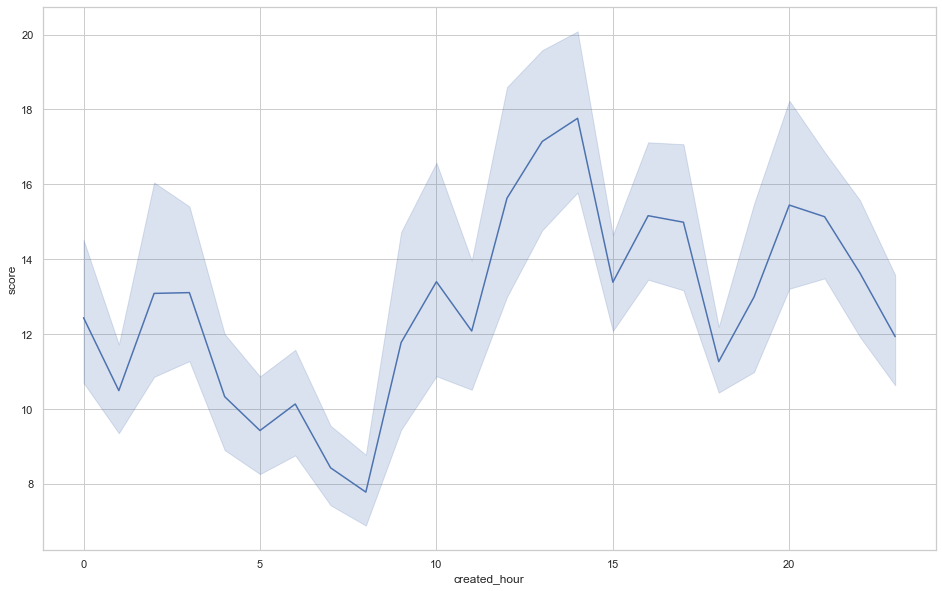

In [35]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_hour", y="score")

<AxesSubplot:xlabel='created_day', ylabel='score'>

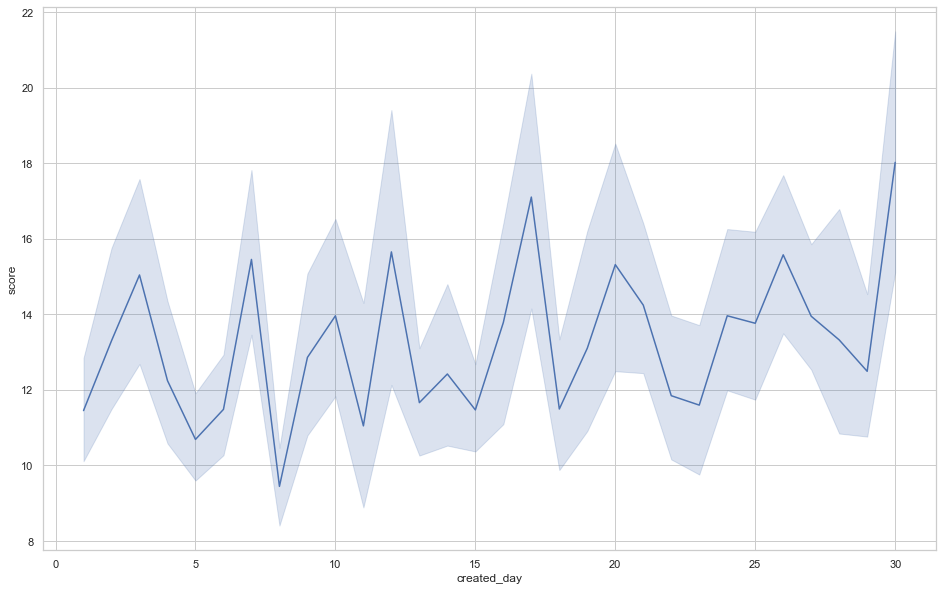

In [36]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_day", y="score")

# Which Author have the most scores

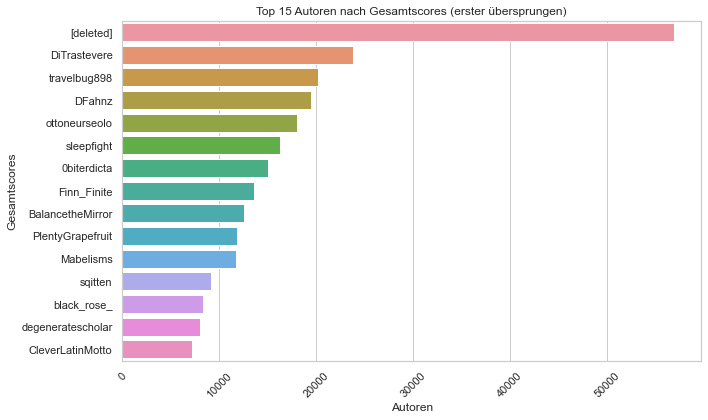

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten
# Stellen Sie sicher, dass Sie denselben DataFrame-Namen verwenden

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den ersten Autor aus der sortierten Liste entfernen
sorted_authors = sorted_authors.iloc[0:]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()

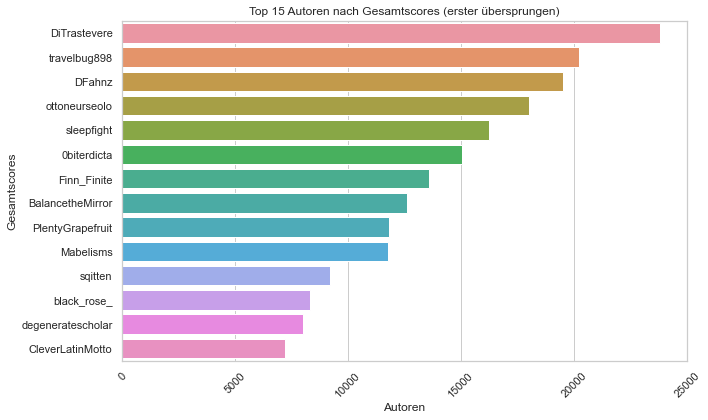

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten
# Stellen Sie sicher, dass Sie denselben DataFrame-Namen verwenden

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den ersten Autor aus der sortierten Liste entfernen
sorted_authors = sorted_authors.iloc[0:]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Entferne den Autor "[deleted]" aus den Top-Autoren
top_authors = top_authors[top_authors.index != '[deleted]']

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()

In [39]:
df.describe()

,gilded,score,created_hour,created_day,created_year,comment_len
count,162369.000000,162369.000000,162369.000000,162369.000000,162369.0,162369.000000
mean,0.000474,13.161053,12.900726,15.112398,2019.0,73.416323
std,0.023669,82.743180,7.259889,8.489592,0.0,81.755785
min,0.000000,-225.000000,0.000000,1.000000,2019.0,1.000000
25%,0.000000,1.000000,6.000000,8.000000,2019.0,24.000000
50%,0.000000,2.000000,15.000000,15.000000,2019.0,48.000000
75%,0.000000,6.000000,19.000000,22.000000,2019.0,93.000000
max,3.000000,6951.000000,23.000000,30.000000,2019.0,2074.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162369 entries, 0 to 162389
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   author            162369 non-null  object
 1   body              162369 non-null  object
 2   controversiality  162369 non-null  bool  
 3   created_utc       162369 non-null  object
 4   distinguished     162369 non-null  object
 5   edited            162369 non-null  bool  
 6   gilded            162369 non-null  int64 
 7   id                162369 non-null  object
 8   link_id           162369 non-null  object
 9   parent_id         162369 non-null  object
 10  score             162369 non-null  int64 
 11  stickied          162369 non-null  bool  
 12  created_hour      162369 non-null  int64 
 13  created_day       162369 non-null  int64 
 14  created_year      162369 non-null  int64 
 15  clean_text        162369 non-null  object
 16  comment_len       162369 non-null  int

# Save cleaned general data

In [41]:
df.to_csv("relationship_19_comments_EDA_clean.csv",index=False,sep=";")

In [42]:
import pandas as pd
test_author=pd.read_csv("relationship_19_comments_EDA_clean.csv",sep=";")
print("Anzahl der Authoren==",test_author['author'].nunique())

Anzahl der Authoren== 34333


/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [43]:
test_author.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162369 entries, 0 to 162368
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   author            162369 non-null  object
 1   body              162369 non-null  object
 2   controversiality  162369 non-null  bool  
 3   created_utc       162369 non-null  object
 4   distinguished     162369 non-null  object
 5   edited            162369 non-null  bool  
 6   gilded            162369 non-null  int64 
 7   id                162369 non-null  object
 8   link_id           162369 non-null  object
 9   parent_id         162369 non-null  object
 10  score             162369 non-null  int64 
 11  stickied          162369 non-null  bool  
 12  created_hour      162369 non-null  int64 
 13  created_day       162369 non-null  int64 
 14  created_year      162369 non-null  int64 
 15  clean_text        162369 non-null  object
 16  comment_len       162369 non-null  int

In [44]:
test_author.describe()

,gilded,score,created_hour,created_day,created_year,comment_len
count,162369.000000,162369.000000,162369.000000,162369.000000,162369.0,162369.000000
mean,0.000474,13.161053,12.900726,15.112398,2019.0,73.416323
std,0.023669,82.743180,7.259889,8.489592,0.0,81.755785
min,0.000000,-225.000000,0.000000,1.000000,2019.0,1.000000
25%,0.000000,1.000000,6.000000,8.000000,2019.0,24.000000
50%,0.000000,2.000000,15.000000,15.000000,2019.0,48.000000
75%,0.000000,6.000000,19.000000,22.000000,2019.0,93.000000
max,3.000000,6951.000000,23.000000,30.000000,2019.0,2074.000000
